# G2M insight for Cab Investment firm

## Author: Lauro Cesar Ribeiro

#### What is the Business problem?

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

#### What is my plan of Attack?

I decided to do an Exploratory Data Analysis with Pandas, some visualizations to answers a few questions that I broke down into Gender, Age, Company, Kilometres Travelled, Priced charged and Margins. Throughout different periods of the year, looking for any seasonal insights on which company is performing better. Finally, I will implement RFM Customer Segmentation to check who the best customers` information is, so then, I go for the T-Test section where I used statistics to prove some hypothesis I raised during my exploration and a recommendation based on my findings and conclusion.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [2]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
transaction = pd.read_csv("Transaction_ID.csv")
customer = pd.read_csv("Customer_ID.csv")
holiday = pd.read_csv("us_holidays.csv")

##### Cab_Data.csv - this file includes details of transaction for 2 cab companies.

- TransactionID: Transaction number of that trip.

- Date of Travel: Date of when that trip happened.

- Company: Yellow Cab or Pink Cab.

- City: A sample of US cities.

- KM Travelled: Kilometres travelled on that particular trip.	

- Price Charged: Total price of the trip.

- Cost of Trip: Estimate price of the trip.


In [3]:
cab.head()

,TransactionID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


##### City.csv -  this file contains list of US cities, their population and number of cab users

- City: Sample of US cities.
- Population: Population from each city.
- Users: Total number of Users in each city.

In [4]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


##### Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

- TransactionID: Transaction number of that trip.
- CustomerID: Customer Identification Number.
- Payment_Mode: Card or Cash Payment in each trip.

In [5]:
transaction.head()

,TransactionID,CustomerID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


##### Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

- CustomerID: Customer Identification Number.
- Gender: Male or Female.
- Age: Customer`s age.
- Income(USD/Month): Customer`s monthly earnings.

In [6]:
customer.head()

,CustomerID,Gender,Age,Income(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


#### us_holidays.csv - Contains information about all holidays in US from 2012 till 2020

- date - yyyy-mm-dd

- holiday_name - String - Name of the holiday.

- holiday - Boolean - TRUE for holiday, FALSE for no holiday.

- year - Integer - Year.

- month - Integer - Month.

- wday - Integer - Number of weekday. 1-7, starts on Monday.

- weekend - Boolean - TRUE if weekend (Saturday or Sunday), FALSE if weekday.

- long_holiday - Boolean - If holiday is more than 2 days. Here we added so if there's an holiday for an example on tuesday. Sat-Tue will be marked as 'long holiday' because Monday is a bridge day. TRUE for long holidays and FALSE for short holidays

- schoolbreak - String - Name/description of school break. christmasbreak, nobreak, midwinterbreak, springbreak, summer_break

- dayno - Integer - Number of the day in month.

In [7]:
holiday.head()

,date,holiday_name,holiday,year,month,wday,weekend,long_holiday,school_break,dayno
0,2012-01-01,New Year Day,True,2012,1,7,True,True,christmas_break,1
1,2012-01-02,FALSE,False,2012,1,1,False,False,no_break,2
2,2012-01-03,FALSE,False,2012,1,2,False,False,no_break,3
3,2012-01-04,FALSE,False,2012,1,3,False,False,no_break,4
4,2012-01-05,FALSE,False,2012,1,4,False,False,no_break,5


## Merge Datasets into a new Dataframe.

The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes will be ignored. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on. When performing a cross merge, no column specifications to merge on are allowed.

In [8]:
a = pd.merge(cab, city)
b = pd.merge(a, transaction)
test = pd.merge(b, customer)


# First Five rows
test.head()

,TransactionID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,CustomerID,Payment_Mode,Gender,Age,Income(USD/Month)
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


In [9]:
# Rename Columns

test = test.rename(columns={"Date of Travel": "Date_of_Travel",
                    "KM Travelled":"KM_Travelled",
                    "Price Charged":"Price_Charged",
                    "Cost of Trip":"Cost_of_Trip",
                    "Income(USD/Month)":"Income"})

In [10]:
# Remove Duplicates

test = test.drop_duplicates()

In [11]:
# Check for Null Values

test.isna().any().any()

False

In [12]:
# Information on Dataframe

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   359392 non-null  int64  
 1   Date_of_Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM_Travelled    359392 non-null  float64
 5   Price_Charged   359392 non-null  float64
 6   Cost_of_Trip    359392 non-null  float64
 7   Population      359392 non-null  object 
 8   Users           359392 non-null  object 
 9   CustomerID      359392 non-null  int64  
 10  Payment_Mode    359392 non-null  object 
 11  Gender          359392 non-null  object 
 12  Age             359392 non-null  int64  
 13  Income          359392 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


In [13]:
# Statistical Information on Dataframe

test.describe()

,TransactionID,KM_Travelled,Price_Charged,Cost_of_Trip,CustomerID,Age,Income
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [14]:
# Converting into Datetime, extract day, weekday, month and year.

test['Date_of_Travel'] = pd.to_datetime(test['Date_of_Travel'].str.strip(), format='%d/%m/%Y')

test['day'] = pd.DatetimeIndex(test['Date_of_Travel']).day
test['weekday'] = pd.DatetimeIndex(test['Date_of_Travel']).weekday
test['month'] = pd.DatetimeIndex(test['Date_of_Travel']).month
test['year'] = pd.DatetimeIndex(test['Date_of_Travel']).year

In [15]:
holiday['date'] = pd.to_datetime(holiday['date'].str.strip(), format='%Y/%m/%d')

holiday['weekday'] = pd.DatetimeIndex(holiday['date']).weekday
holiday.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [16]:
holiday.drop(['date','wday'], inplace=True, axis=1)

In [17]:
holiday = holiday.query('year >= 2016 & year <= 2018')
holiday.head()

,holiday_name,holiday,year,month,weekend,long_holiday,school_break,dayno,weekday
1461,New Year Day,True,2016,1,False,False,christmas_break,1,4
1462,FALSE,False,2016,1,True,True,no_break,2,5
1463,FALSE,False,2016,1,True,True,no_break,3,6
1464,FALSE,False,2016,1,False,False,no_break,4,0
1465,FALSE,False,2016,1,False,False,no_break,5,1


In [18]:
holiday = holiday.rename(columns={"dayno":"day"})
holiday.columns

Index(['holiday_name', 'holiday', 'year', 'month', 'weekend', 'long_holiday',
       'school_break', 'day', 'weekday'],
      dtype='object')

In [19]:
holiday.duplicated().any()

False

In [20]:
taxi = pd.merge(test, holiday, on=['year','day','month','weekday'], how='left')
print("Is null? ", taxi.isna().sum().any())
taxi = taxi.drop_duplicates()
print(taxi.shape)

Is null?  False
(359392, 23)


In [21]:
taxi.head()

,TransactionID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,CustomerID,...,Income,day,weekday,month,year,holiday_name,holiday,weekend,long_holiday,school_break
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,...,10813,8,4,1,2016,FALSE,False,False,False,no_break
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,...,10813,21,5,7,2018,FALSE,False,True,False,summer_break
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,...,10813,23,4,11,2018,FALSE,False,False,False,no_break
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,...,9237,6,2,1,2016,FALSE,False,False,False,no_break
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,...,9237,21,5,4,2018,FALSE,False,True,False,spring_break


In [22]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   TransactionID   359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
 7   Population      359392 non-null  object        
 8   Users           359392 non-null  object        
 9   CustomerID      359392 non-null  int64         
 10  Payment_Mode    359392 non-null  object        
 11  Gender          359392 non-null  object        
 12  Age             359392 non-null  int64         
 13  Income          359392 non-null  int64         
 14  day             359392 non-null  int

# 1. Exploratory Data Analysis

## - Gender

## What is the total users` gender by each company?

In [23]:
taxi.groupby('Company')['Gender'].value_counts().sort_values(ascending=False)

Company     Gender
Yellow Cab  Male      158681
            Female    116000
Pink Cab    Male       47231
            Female     37480
Name: Gender, dtype: int64

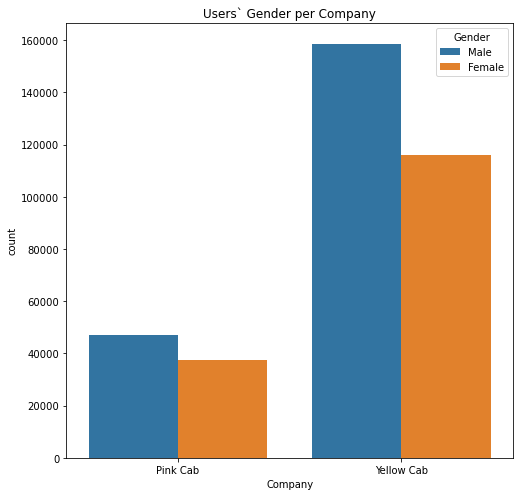

In [24]:
fig, ax= plt.subplots(figsize=(8,8))

ax = sns.countplot(x='Company', data=taxi, hue='Gender').set_title("Users` Gender per Company")

## What is the Customer share by Gender?

In [25]:
taxi.groupby('Gender')['TransactionID'].count().sort_values(ascending=False)

Gender
Male      205912
Female    153480
Name: TransactionID, dtype: int64

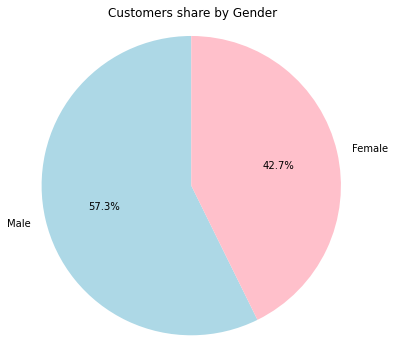

In [26]:
label = 'Male','Female' 
pct = [taxi[(taxi.Gender=='Male') ]['Gender'].count(),taxi[(taxi.Gender=='Female') ]['Gender'].count() ]
color =('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pct, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customers share by Gender')
plt.show()

## What is the Yellow Cab Customers share by Gender?

In [27]:
taxi.query('Company == "Yellow Cab"')['Gender'].value_counts().sort_values(ascending=False)

Male      158681
Female    116000
Name: Gender, dtype: int64

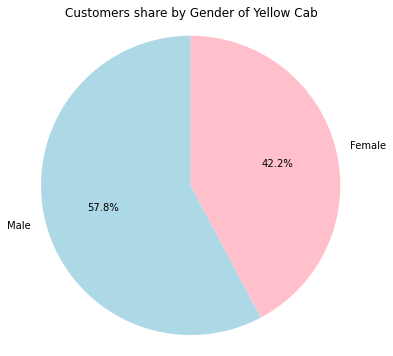

In [28]:
label = 'Male','Female' 
data = [taxi[(taxi.Gender=='Male') & (taxi.Company=='Yellow Cab')]['Gender'].count(),taxi[(taxi.Gender=='Female') & (taxi.Company=='Yellow Cab')]['Gender'].count() ]
color = ('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customers share by Gender of Yellow Cab')
plt.show()

## What is the Pink Cab Customers share by Gender?

In [29]:
taxi.query('Company == "Pink Cab"')['Gender'].value_counts().sort_values(ascending=False)

Male      47231
Female    37480
Name: Gender, dtype: int64

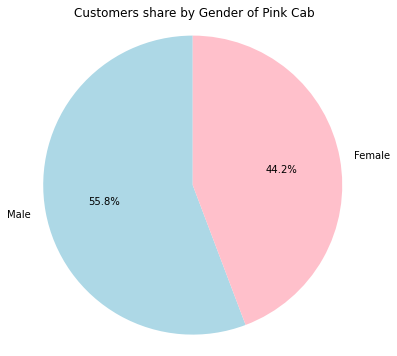

In [30]:
label = 'Male','Female' 
data = [taxi[(taxi.Gender=='Male') & (taxi.Company=='Pink Cab')]['Gender'].count(),taxi[(taxi.Gender=='Female') & (taxi.Company=='Pink Cab')]['Gender'].count() ]
color = ('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customers share by Gender of Pink Cab')
plt.show()

## What is the Customer share at the Weekends?

In [31]:
taxi.query('weekend == True')['Gender'].value_counts().sort_values(ascending=False)

Male      85352
Female    63192
Name: Gender, dtype: int64

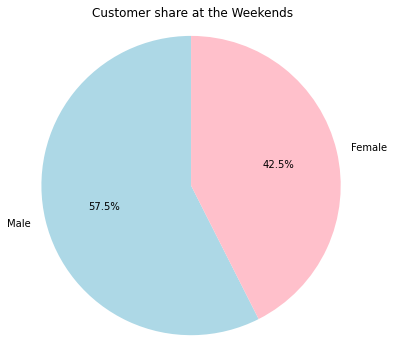

In [32]:
label = 'Male','Female' 
data = [taxi[(taxi.Gender=='Male') & (taxi.weekend == True)]['Gender'].count(),taxi[(taxi.Gender=='Female') & (taxi.weekend == True)]['Gender'].count() ]
color = ('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customer share at the Weekends')
plt.show()

## What is the Customer share from Monday till Friday?

In [33]:
taxi.query('weekend == False')['Gender'].value_counts().sort_values(ascending=False)

Male      120560
Female     90288
Name: Gender, dtype: int64

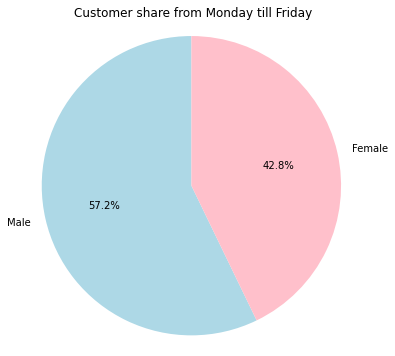

In [34]:
label = 'Male','Female' 
data = [taxi[(taxi.Gender=='Male') & (taxi.weekend == False)]['Gender'].count(),taxi[(taxi.Gender=='Female') & (taxi.weekend == False)]['Gender'].count() ]
color = ('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customer share from Monday till Friday')
plt.show()

## What is the Customer Share during Holidays?

In [35]:
taxi.query('holiday == True')['Gender'].value_counts().sort_values(ascending=False)

Male      6144
Female    4529
Name: Gender, dtype: int64

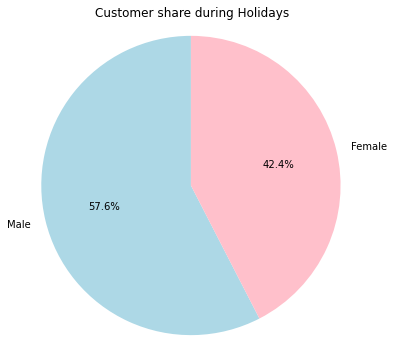

In [36]:
label = 'Male','Female' 
data = [taxi[(taxi.Gender=='Male') & (taxi.holiday == True)]['Gender'].count(),taxi[(taxi.Gender=='Female') & (taxi.holiday == True)]['Gender'].count() ]
color = ('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customer share during Holidays')
plt.show()

## What is the Customer Share when there is no Holidays?

In [37]:
taxi.query('holiday == False')['Gender'].value_counts().sort_values(ascending=False)

Male      199768
Female    148951
Name: Gender, dtype: int64

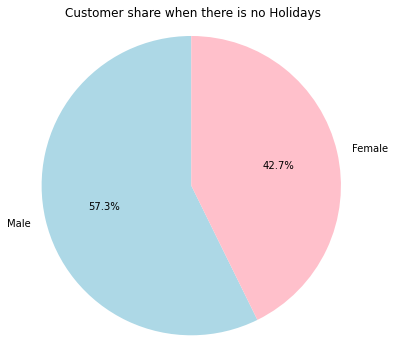

In [38]:
label = 'Male','Female' 
data = [taxi[(taxi.Gender=='Male') & (taxi.holiday == False)]['Gender'].count(),taxi[(taxi.Gender=='Female') & (taxi.holiday == False)]['Gender'].count() ]
color = ('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customer share when there is no Holidays')
plt.show()

## What is the customer Share during Long Holidays?

In [39]:
taxi.query('long_holiday == True')['Gender'].value_counts().sort_values(ascending=False)

Male      20293
Female    14737
Name: Gender, dtype: int64

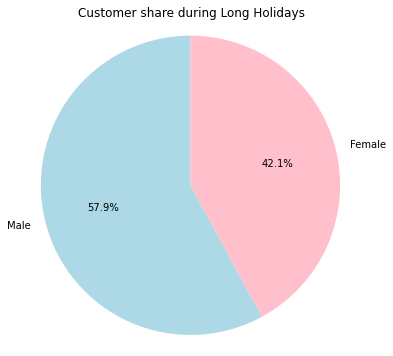

In [40]:
label = 'Male','Female' 
data = [taxi[(taxi.Gender=='Male') & (taxi.long_holiday == True)]['Gender'].count(),taxi[(taxi.Gender=='Female') & (taxi.long_holiday == True)]['Gender'].count() ]
color = ('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customer share during Long Holidays')
plt.show()

## What is the customer Share when there is no Long Holidays?

In [41]:
taxi.query('long_holiday == False')['Gender'].value_counts().sort_values(ascending=False)

Male      185619
Female    138743
Name: Gender, dtype: int64

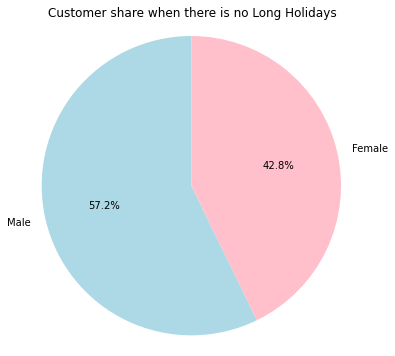

In [42]:
label = 'Male','Female' 
data = [taxi[(taxi.Gender=='Male') & (taxi.long_holiday == False)]['Gender'].count(),taxi[(taxi.Gender=='Female') & (taxi.long_holiday == False)]['Gender'].count() ]
color = ('lightblue','pink')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
ax.axis('equal')

plt.title('Customer share when there is no Long Holidays')
plt.show()

## What is the most used Payment Mode by Gender?

In [43]:
taxi.groupby('Payment_Mode')['Gender'].value_counts().sort_values(ascending=False)

Payment_Mode  Gender
Card          Male      123479
              Female     92025
Cash          Male       82433
              Female     61455
Name: Gender, dtype: int64

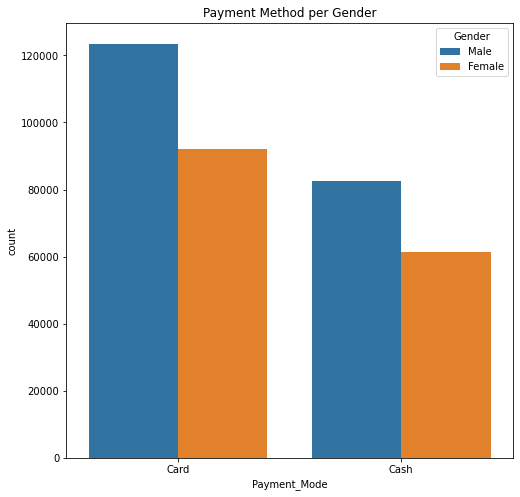

In [44]:
fig, ax= plt.subplots(figsize=(8,8))

ax = sns.countplot(x='Payment_Mode', data=taxi, hue='Gender').set_title("Payment Method per Gender")

# What is the number of users in each city by gender?

In [45]:
taxi.groupby('City')['Gender'].value_counts().sort_values(ascending=False)

City            Gender
NEW YORK NY     Male      60334
                Female    39551
CHICAGO IL      Male      34637
LOS ANGELES CA  Male      27244
WASHINGTON DC   Male      25054
CHICAGO IL      Female    21988
LOS ANGELES CA  Female    20789
WASHINGTON DC   Female    18683
BOSTON MA       Male      16529
                Female    13163
SAN DIEGO CA    Male      10866
                Female     9622
SILICON VALLEY  Male       4288
SEATTLE WA      Male       4273
SILICON VALLEY  Female     4231
ATLANTA GA      Male       3833
                Female     3724
SEATTLE WA      Female     3724
DALLAS TX       Male       3651
                Female     3366
MIAMI FL        Male       3237
                Female     3217
AUSTIN TX       Male       2499
                Female     2397
ORANGE COUNTY   Male       2034
DENVER CO       Male       1975
ORANGE COUNTY   Female     1948
DENVER CO       Female     1850
NASHVILLE TN    Male       1580
                Female     1430
SACRAMENTO CA   F

## What is the users` payment mode in each city and using different companies?

In [46]:
taxi.groupby(['City', 'Company', 'Gender'])['Payment_Mode'].value_counts().sort_values(ascending=False)

City           Company     Gender  Payment_Mode
NEW YORK NY    Yellow Cab  Male    Card            31076
                                   Cash            20869
                           Female  Card            20376
CHICAGO IL     Yellow Cab  Male    Card            17352
WASHINGTON DC  Yellow Cab  Male    Card            13777
                                                   ...  
PITTSBURGH PA  Pink Cab    Female  Cash              150
               Yellow Cab  Male    Cash              148
TUCSON AZ      Pink Cab    Female  Cash              139
PITTSBURGH PA  Pink Cab    Male    Cash              121
               Yellow Cab  Female  Cash              119
Name: Payment_Mode, Length: 152, dtype: int64

## What is the number of users in each city by the company?

In [47]:
#### Yellow Cabs per City

taxi.query('Company == "Yellow Cab"')['City'].value_counts()

NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: City, dtype: int64

In [48]:
#### Pink Cabs per City

taxi.query('Company == "Pink Cab"')['City'].value_counts()

LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: City, dtype: int64

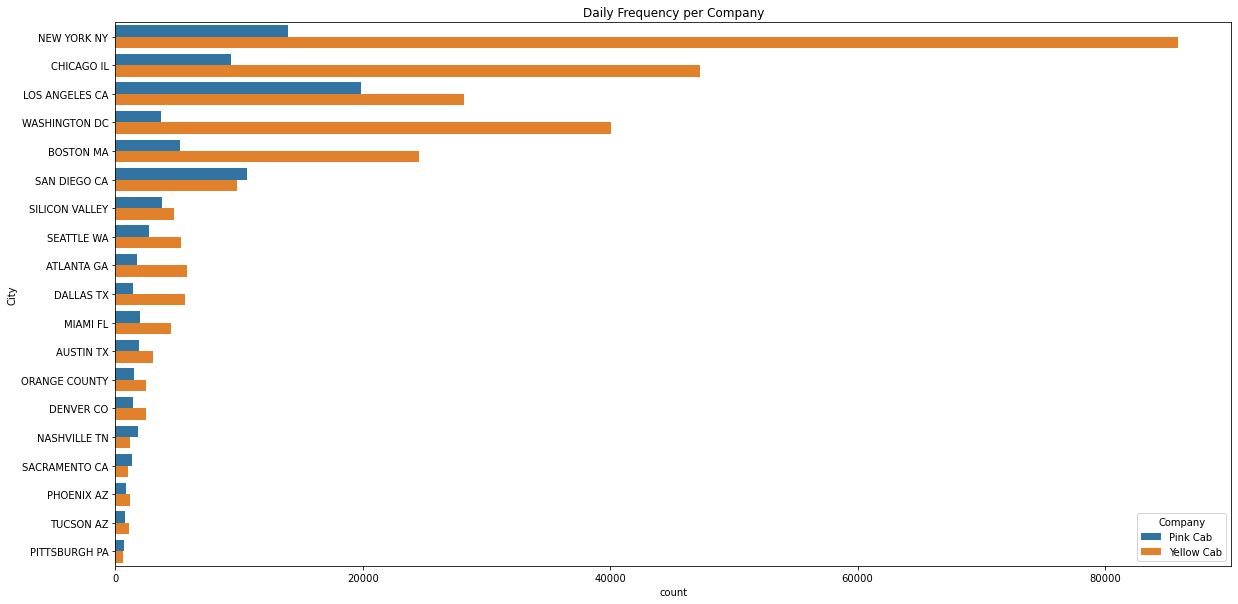

In [49]:
fig, ax= plt.subplots(figsize=(20,10))

ax = sns.countplot(y='City', data=taxi, hue='Company',  order=taxi['City'].value_counts().sort_values(ascending=False).index).set_title("Daily Frequency per Company")

## What is the number of users in each city at the Weekends?

In [50]:
## When it is weekend 

taxi.query('weekend == True')['City'].value_counts()

NEW YORK NY       41302
CHICAGO IL        23594
LOS ANGELES CA    19673
WASHINGTON DC     18076
BOSTON MA         12264
SAN DIEGO CA       8498
SILICON VALLEY     3509
SEATTLE WA         3341
ATLANTA GA         3191
DALLAS TX          2901
MIAMI FL           2639
AUSTIN TX          2049
ORANGE COUNTY      1583
DENVER CO          1568
NASHVILLE TN       1257
SACRAMENTO CA       996
PHOENIX AZ          834
TUCSON AZ           758
PITTSBURGH PA       511
Name: City, dtype: int64

In [51]:
## When it is not weekend

taxi.query('weekend == False')['City'].value_counts()

NEW YORK NY       58583
CHICAGO IL        33031
LOS ANGELES CA    28360
WASHINGTON DC     25661
BOSTON MA         17428
SAN DIEGO CA      11990
SILICON VALLEY     5010
SEATTLE WA         4656
ATLANTA GA         4366
DALLAS TX          4116
MIAMI FL           3815
AUSTIN TX          2847
ORANGE COUNTY      2399
DENVER CO          2257
NASHVILLE TN       1753
SACRAMENTO CA      1371
PHOENIX AZ         1230
TUCSON AZ          1173
PITTSBURGH PA       802
Name: City, dtype: int64

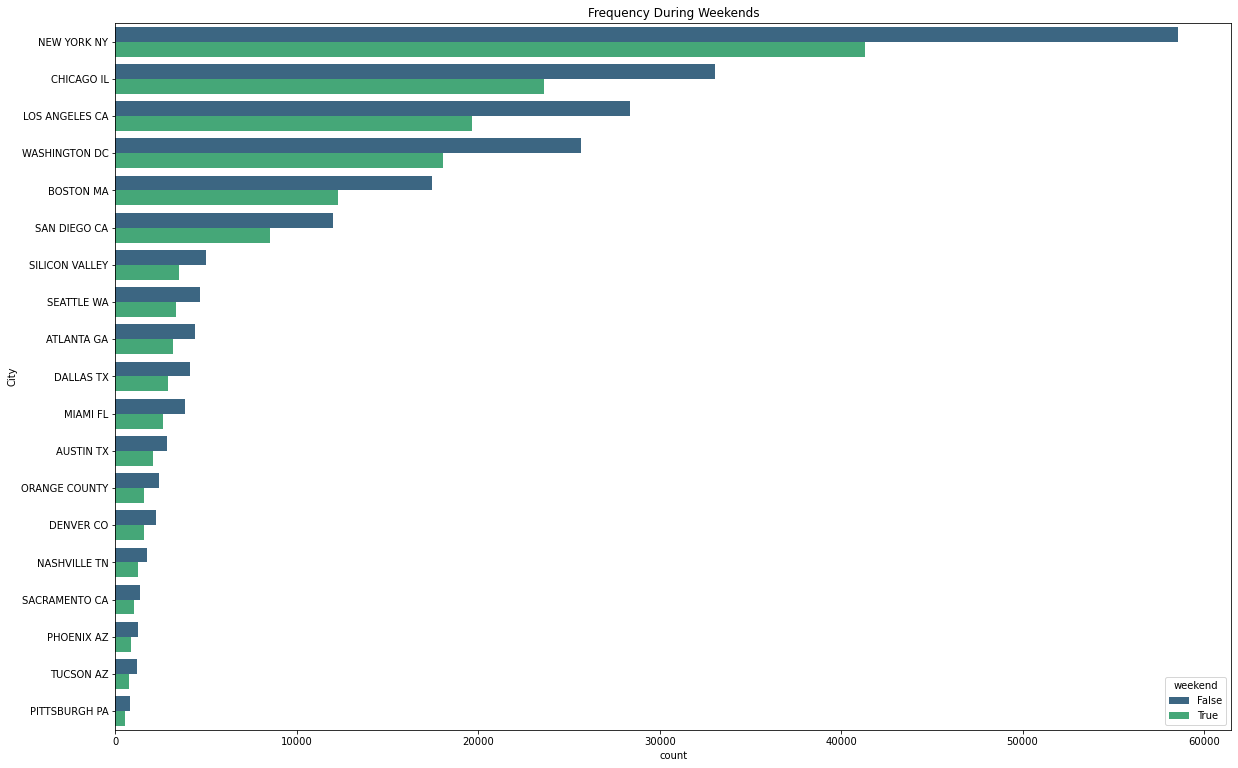

In [52]:
fig, ax= plt.subplots(figsize=(20,13))

ax = sns.countplot(y='City', data=taxi, hue='weekend',  order=taxi['City'].value_counts().sort_values(ascending=False).index, palette='viridis').set_title("Frequency During Weekends")

## What is the number of users in each city during holidays?

In [53]:
## When it is holidays

taxi.query('holiday == True')['City'].value_counts()

NEW YORK NY       3019
CHICAGO IL        1653
LOS ANGELES CA    1413
WASHINGTON DC     1209
BOSTON MA          887
SAN DIEGO CA       650
SILICON VALLEY     244
ATLANTA GA         237
SEATTLE WA         226
MIAMI FL           223
DALLAS TX          210
AUSTIN TX          159
ORANGE COUNTY      115
NASHVILLE TN       100
DENVER CO           96
SACRAMENTO CA       75
TUCSON AZ           62
PHOENIX AZ          54
PITTSBURGH PA       41
Name: City, dtype: int64

In [54]:
## When it is not Holiday

taxi.query('holiday == False')['City'].value_counts()

NEW YORK NY       96866
CHICAGO IL        54972
LOS ANGELES CA    46620
WASHINGTON DC     42528
BOSTON MA         28805
SAN DIEGO CA      19838
SILICON VALLEY     8275
SEATTLE WA         7771
ATLANTA GA         7320
DALLAS TX          6807
MIAMI FL           6231
AUSTIN TX          4737
ORANGE COUNTY      3867
DENVER CO          3729
NASHVILLE TN       2910
SACRAMENTO CA      2292
PHOENIX AZ         2010
TUCSON AZ          1869
PITTSBURGH PA      1272
Name: City, dtype: int64

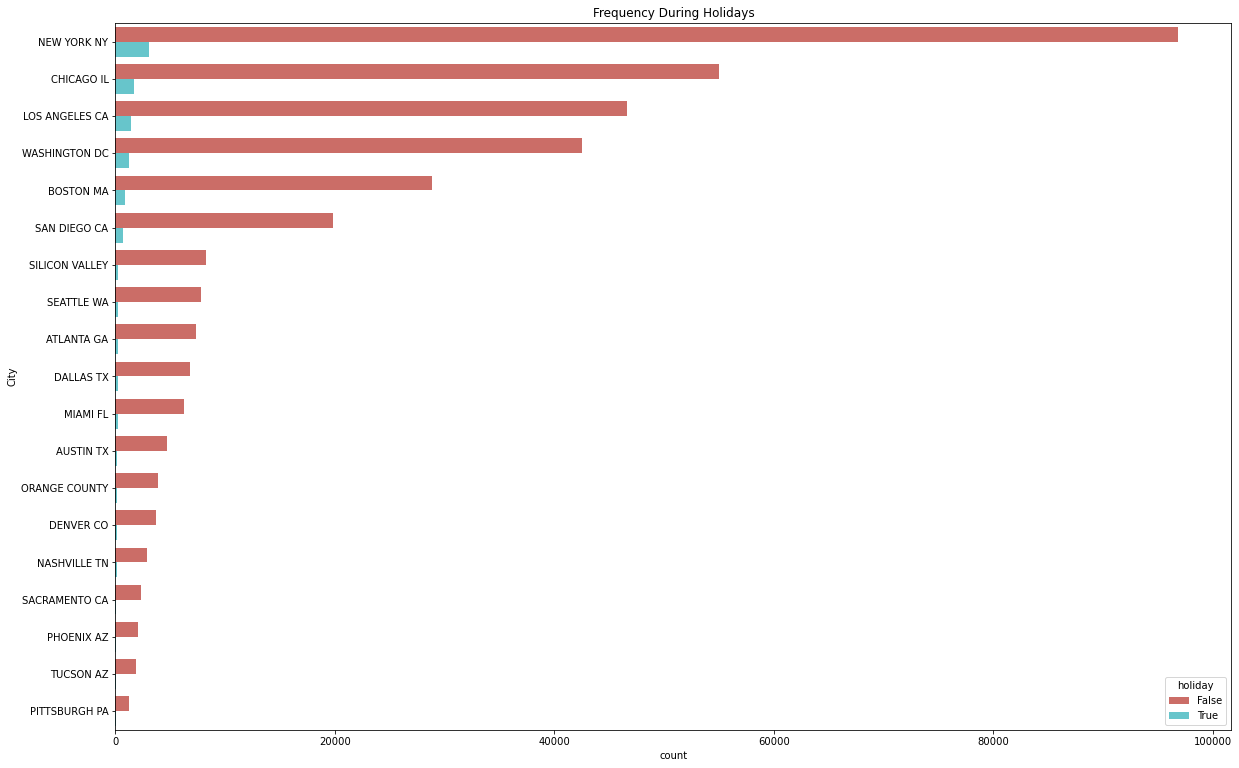

In [55]:
fig, ax= plt.subplots(figsize=(20,13))

ax = sns.countplot(y='City', data=taxi, hue='holiday',  order=taxi['City'].value_counts().sort_values(ascending=False).index, palette='hls').set_title("Frequency During Holidays")

## What is the number of users in each city during long holidays?

In [56]:
## When it is a long holiday

taxi.query('long_holiday == True')['City'].value_counts()

NEW YORK NY       9900
CHICAGO IL        5431
LOS ANGELES CA    4638
WASHINGTON DC     4171
BOSTON MA         2814
SAN DIEGO CA      2010
SILICON VALLEY     826
SEATTLE WA         798
ATLANTA GA         779
DALLAS TX          689
MIAMI FL           674
AUSTIN TX          503
ORANGE COUNTY      392
DENVER CO          370
NASHVILLE TN       292
SACRAMENTO CA      247
TUCSON AZ          196
PHOENIX AZ         190
PITTSBURGH PA      110
Name: City, dtype: int64

In [57]:
## When it is not a long holiday

taxi.query('long_holiday==False')['City'].value_counts()

NEW YORK NY       89985
CHICAGO IL        51194
LOS ANGELES CA    43395
WASHINGTON DC     39566
BOSTON MA         26878
SAN DIEGO CA      18478
SILICON VALLEY     7693
SEATTLE WA         7199
ATLANTA GA         6778
DALLAS TX          6328
MIAMI FL           5780
AUSTIN TX          4393
ORANGE COUNTY      3590
DENVER CO          3455
NASHVILLE TN       2718
SACRAMENTO CA      2120
PHOENIX AZ         1874
TUCSON AZ          1735
PITTSBURGH PA      1203
Name: City, dtype: int64

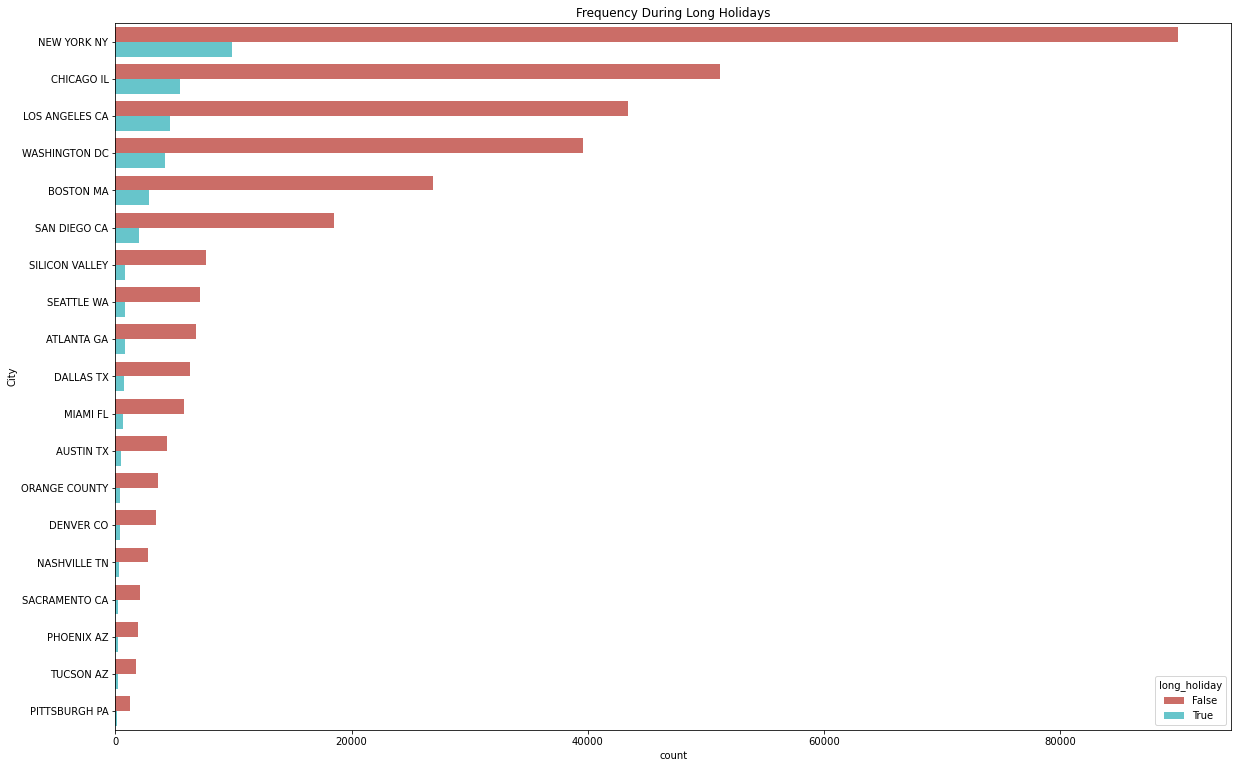

In [58]:
fig, ax= plt.subplots(figsize=(20,13))

ax = sns.countplot(y='City', data=taxi, hue='long_holiday',  order=taxi['City'].value_counts().sort_values(ascending=False).index, palette='hls').set_title("Frequency During Long Holidays")

## What is the Frequency during School breaks in each city?

In [59]:
taxi['school_break'].value_counts()

no_break            268940
summer_break         69934
christmas_break      12333
spring_break          5297
mid_winter_break      2888
Name: school_break, dtype: int64

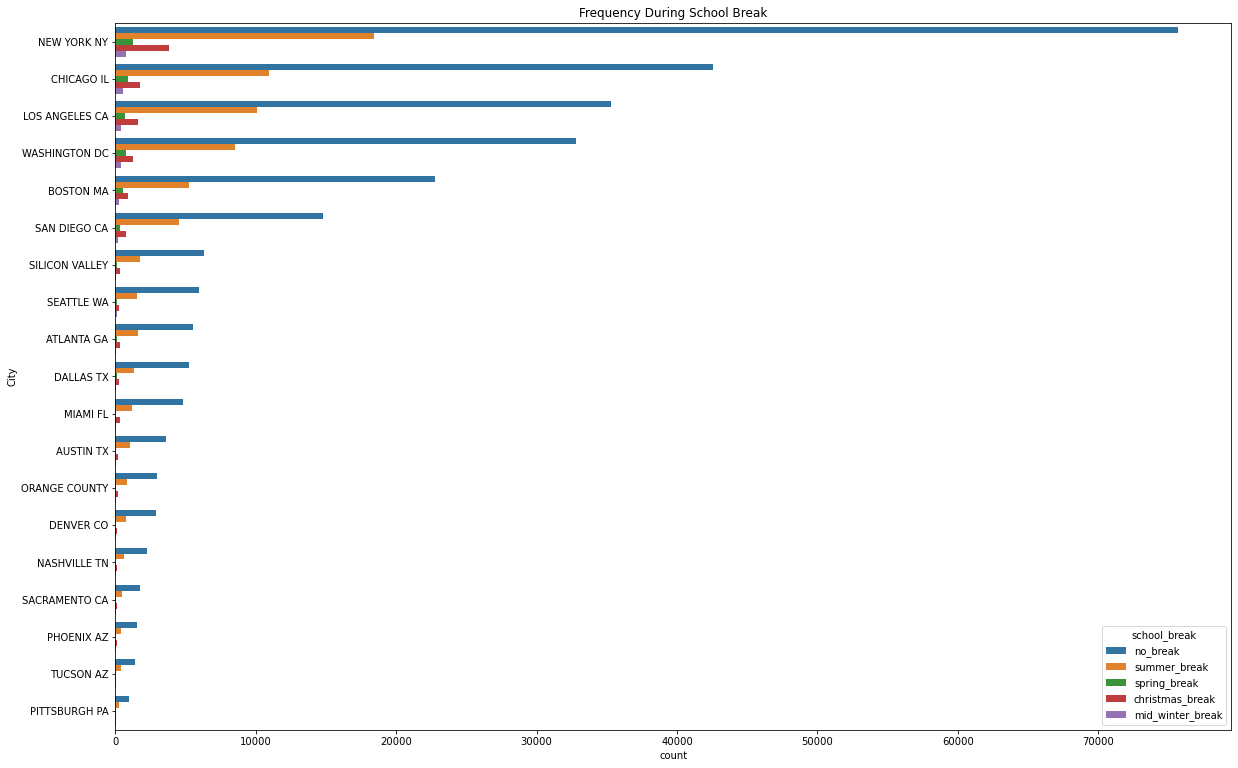

In [60]:
fig, ax= plt.subplots(figsize=(20,13))

ax = sns.countplot(y='City', data=taxi, hue='school_break',  order=taxi['City'].value_counts().sort_values(ascending=False).index).set_title("Frequency During School Break")

## What is the frequency of trips per day for each company?

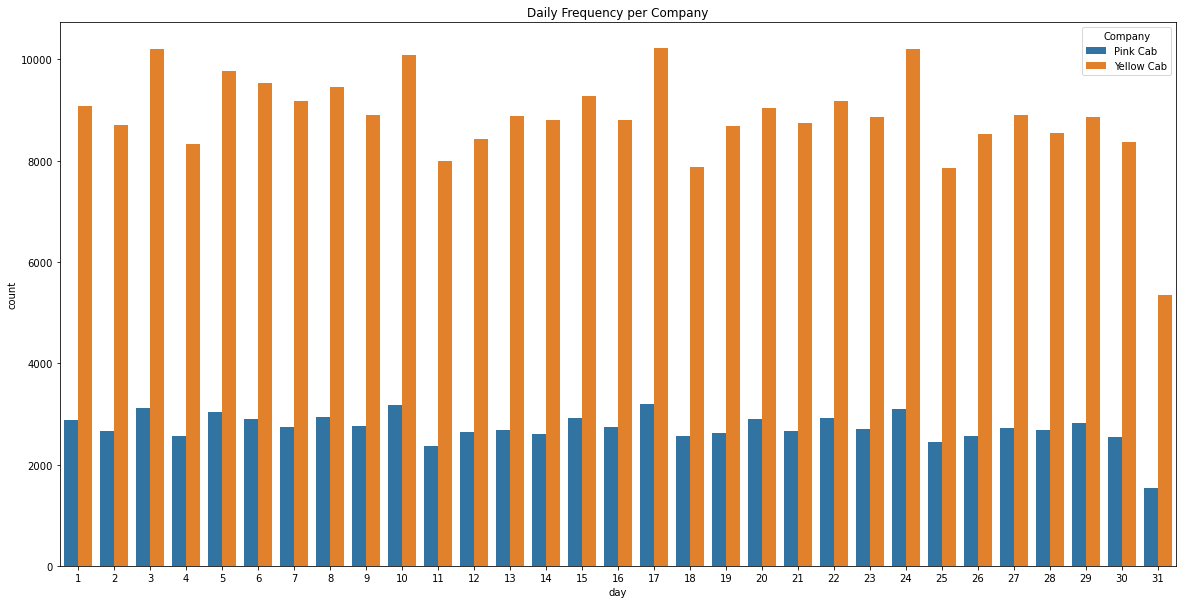

In [61]:
fig, ax= plt.subplots(figsize=(20,10))

ax = sns.countplot(x='day', data=taxi, hue='Company').set_title("Daily Frequency per Company")

## What are the frequency of days that coincide with weekends?

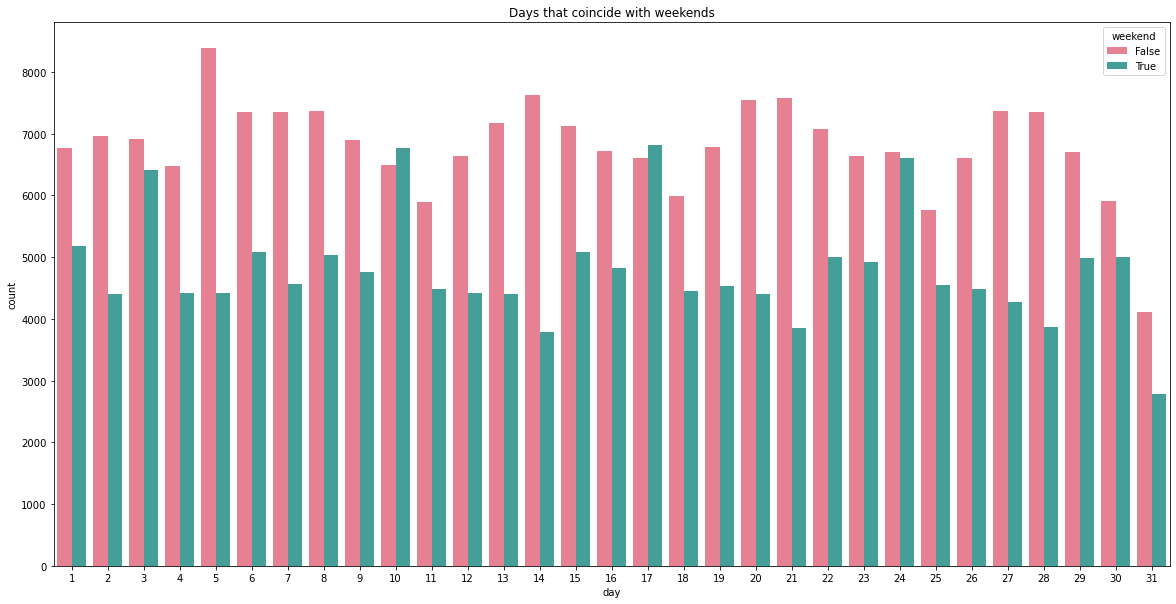

In [62]:
fig, ax= plt.subplots(figsize=(20,10))

ax = sns.countplot(x='day', data=taxi, hue='weekend', palette='husl').set_title("Days that coincide with weekends")

## What is the daily frequency during holidays?

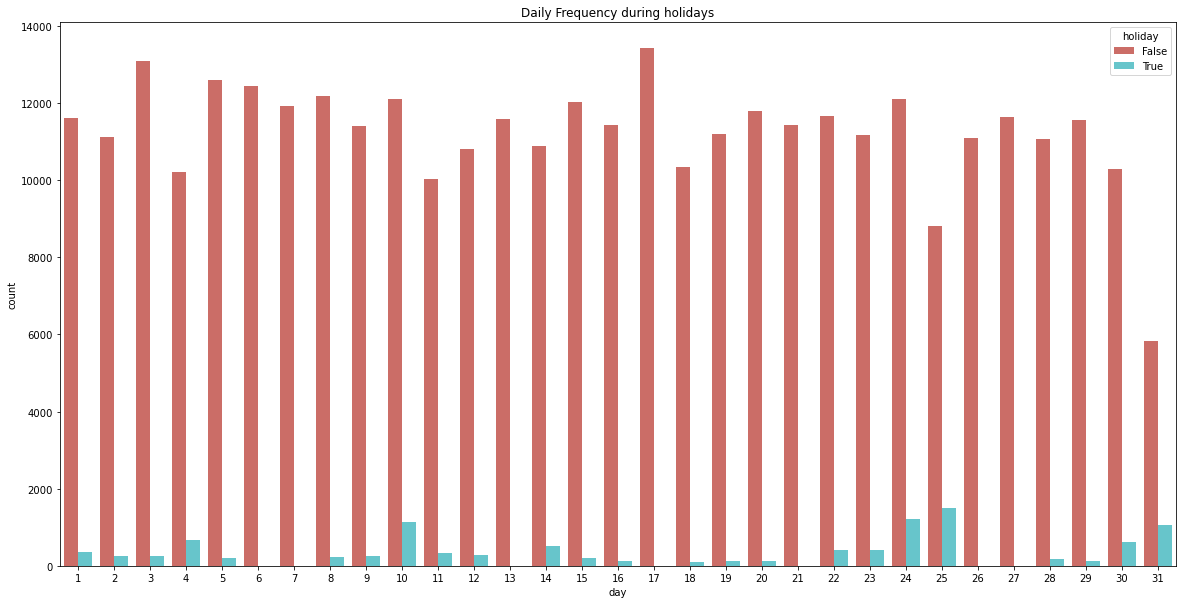

In [63]:
fig, ax= plt.subplots(figsize=(20,10))

ax = sns.countplot(x='day', data=taxi, hue='holiday', palette='hls').set_title("Daily Frequency during holidays")

## What is the daily frequency during long holidays?

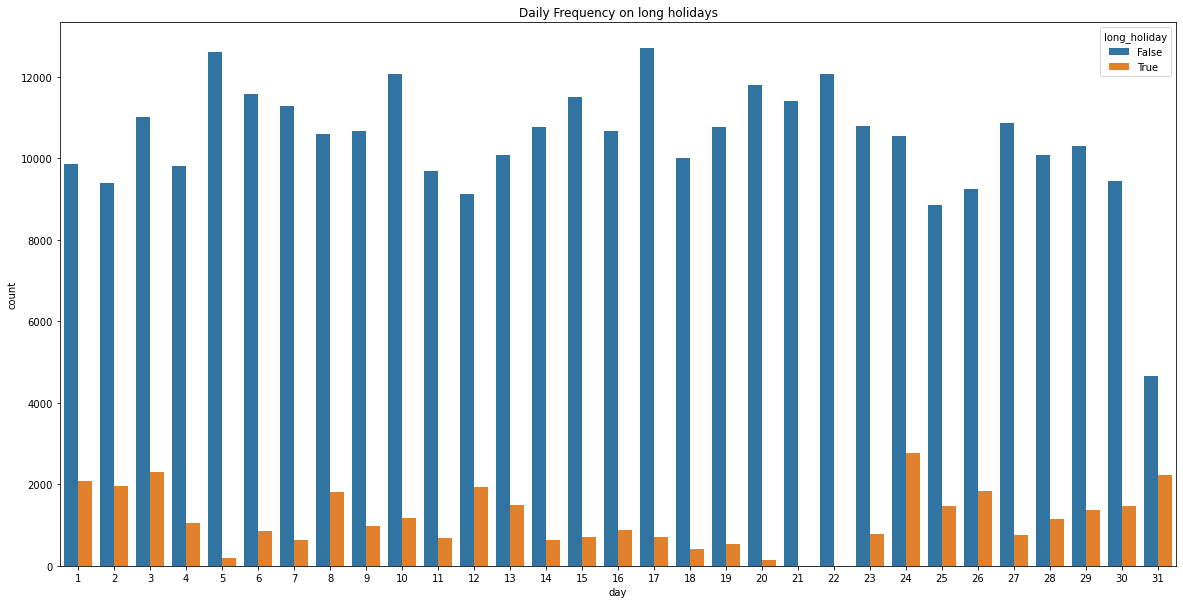

In [64]:
fig, ax= plt.subplots(figsize=(20,10))

ax = sns.countplot(x='day', data=taxi, hue='long_holiday').set_title("Daily Frequency on long holidays")

## What is the daily frequency during school breaks?

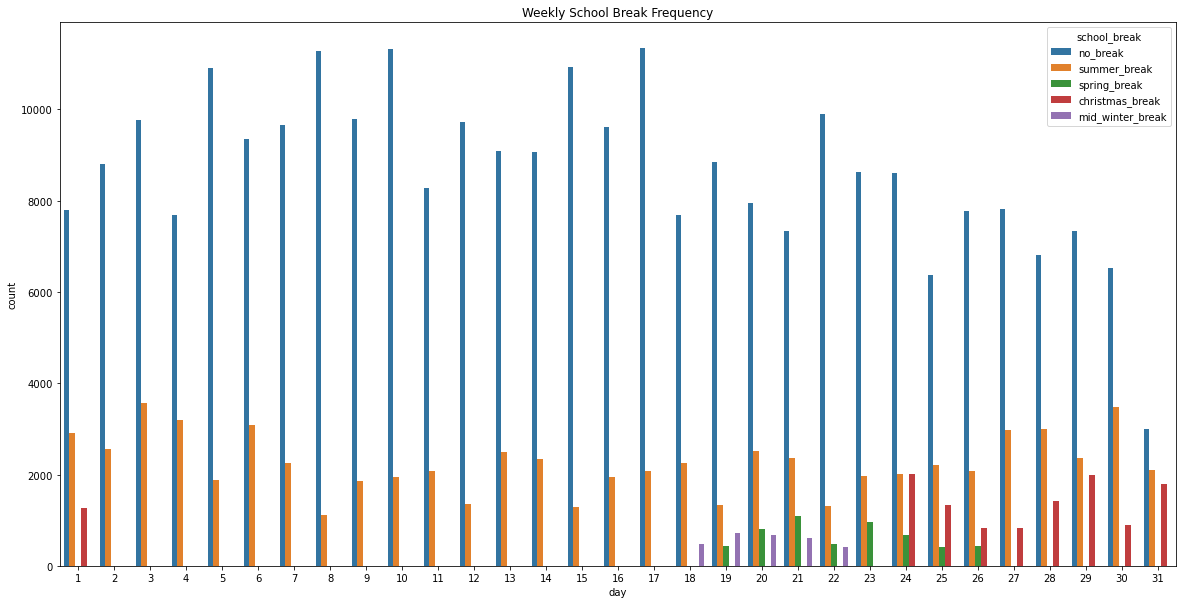

In [65]:
fig, ax= plt.subplots(figsize=(20,10))

ax = sns.countplot(x='day', data=taxi, hue='school_break').set_title("Weekly School Break Frequency")

## What is the frequency of trips per weekday for each company?

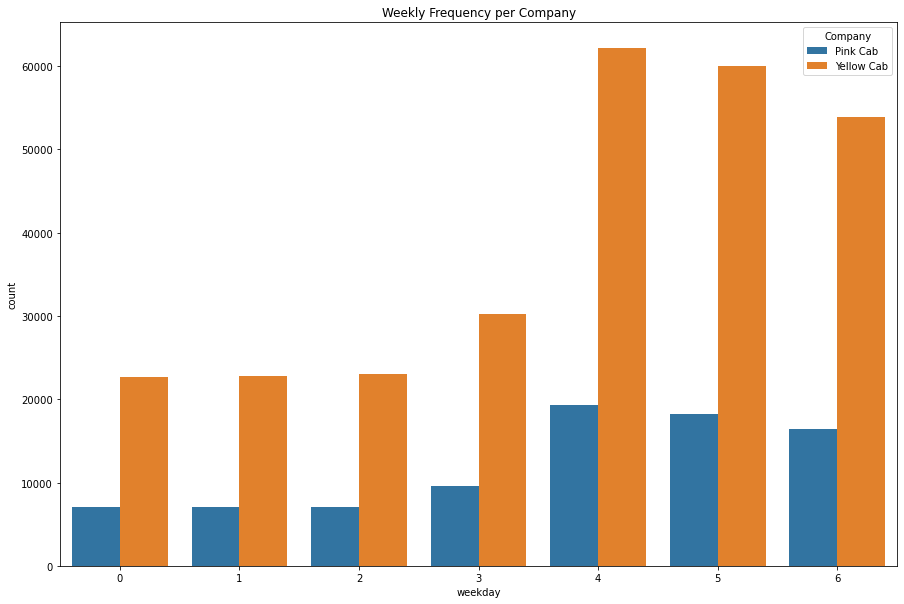

In [66]:
fig, ax= plt.subplots(figsize=(15,10))

ax = sns.countplot(x='weekday', data=taxi, hue='Company').set_title("Weekly Frequency per Company")

## What is the holiday frequency by weekday?

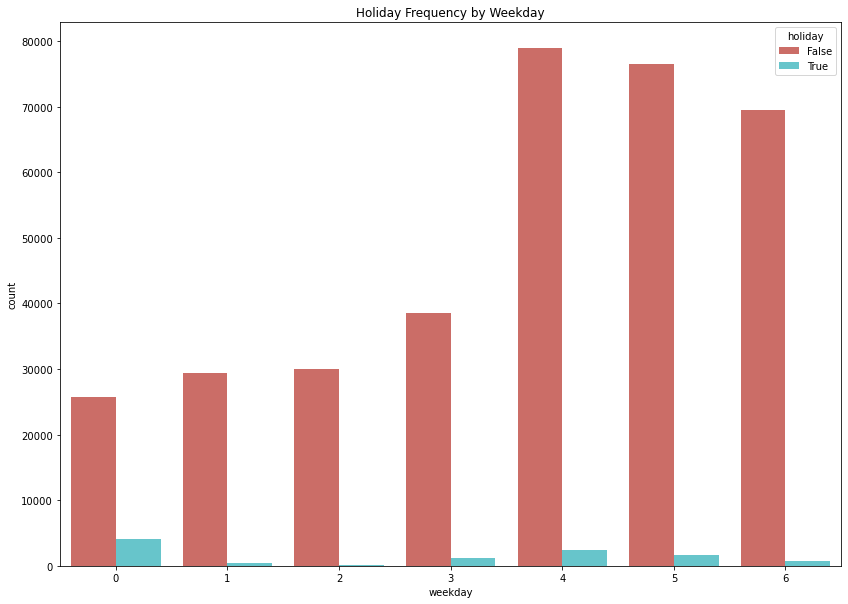

In [67]:
fig, ax= plt.subplots(figsize=(14,10))

ax = sns.countplot(x='weekday', data=taxi, hue='holiday', palette='hls').set_title("Holiday Frequency by Weekday")

## What is the Long Holiday Frequency by Weekday?

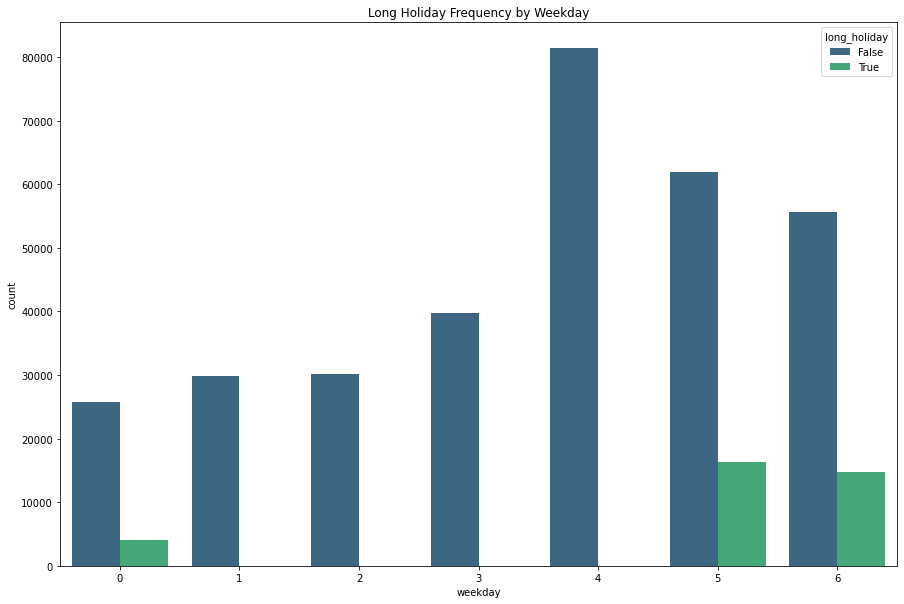

In [68]:
fig, ax= plt.subplots(figsize=(15,10))

ax = sns.countplot(x='weekday', data=taxi, hue='long_holiday', palette='viridis').set_title("Long Holiday Frequency by Weekday")

## What is the weekly school break frequency?

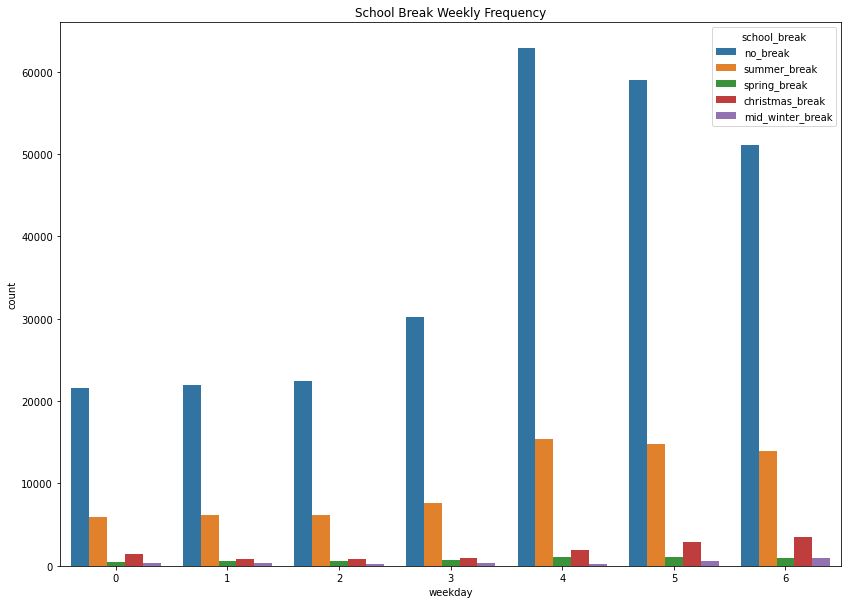

In [69]:
fig, ax= plt.subplots(figsize=(14,10))

ax = sns.countplot(x='weekday', data=taxi, hue='school_break').set_title("School Break Weekly Frequency")

## What is the frequency of trips per month for each company?

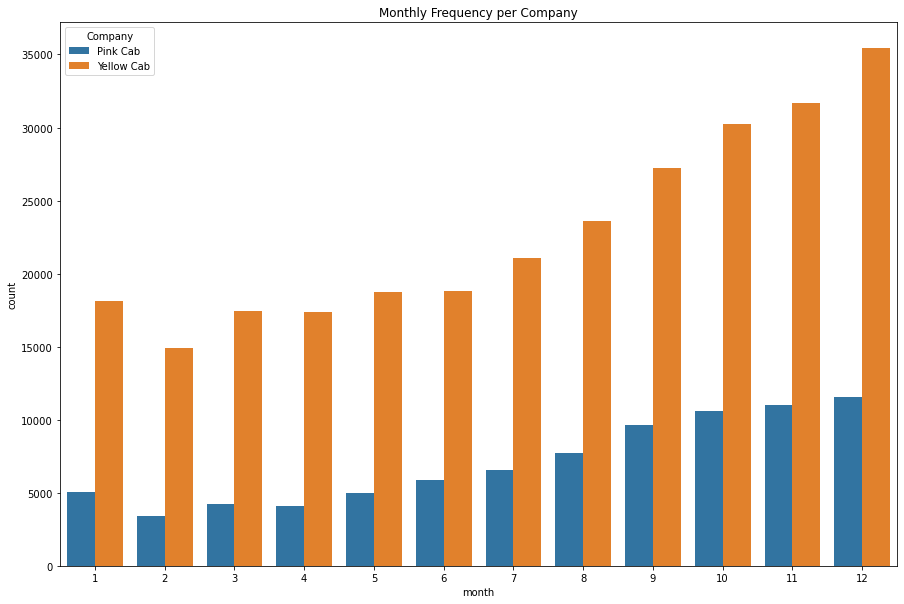

In [70]:
fig, ax= plt.subplots(figsize=(15,10))

ax = sns.countplot(x='month', data=taxi, hue='Company').set_title("Monthly Frequency per Company")

## What is the monthly weekend frequency?

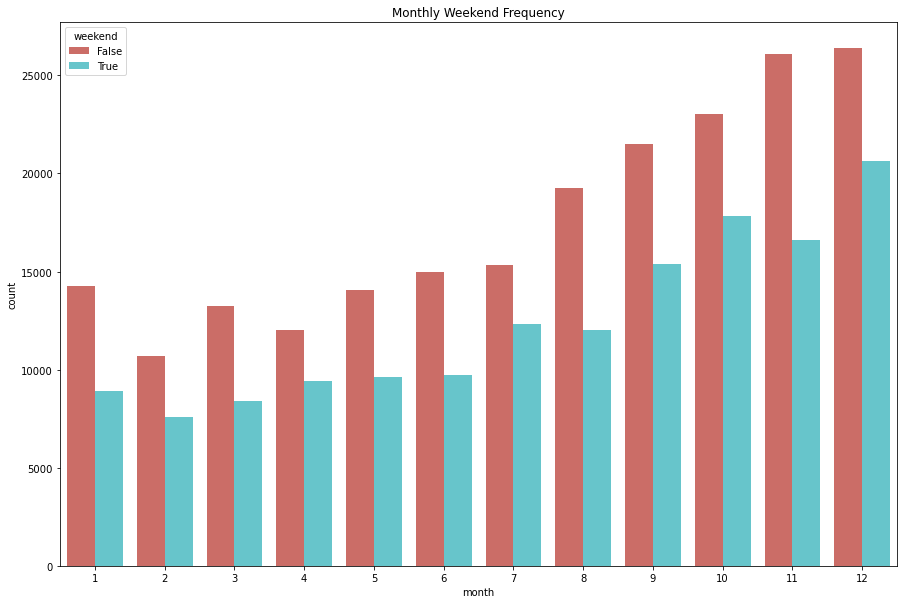

In [71]:
fig, ax= plt.subplots(figsize=(15,10))

ax = sns.countplot(x='month', data=taxi, hue='weekend', palette='hls').set_title("Monthly Weekend Frequency")

## What is the monthly holiday frequency?

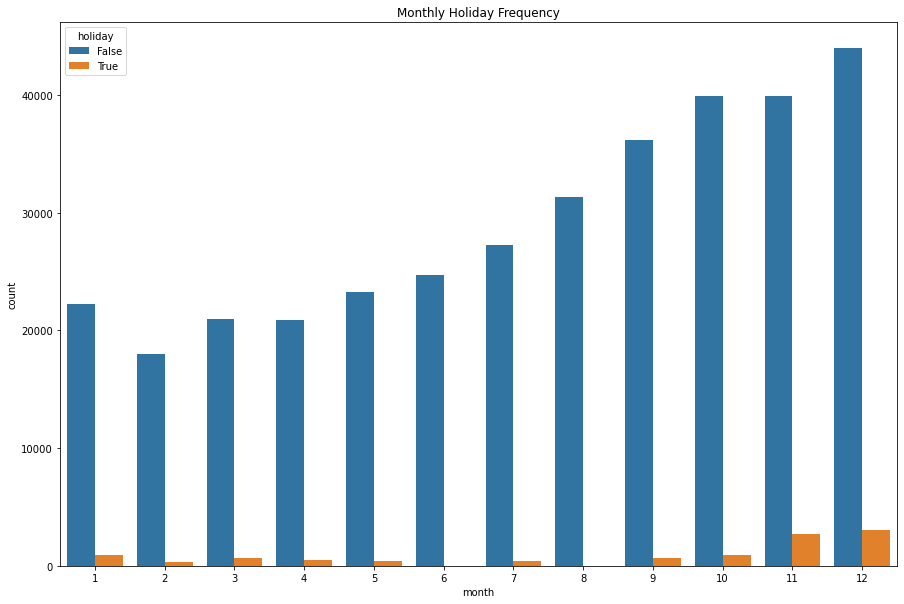

In [72]:
fig, ax= plt.subplots(figsize=(15,10))

ax = sns.countplot(x='month', data=taxi, hue='holiday').set_title("Monthly Holiday Frequency")

## What is the Monthly long holiday frequency?

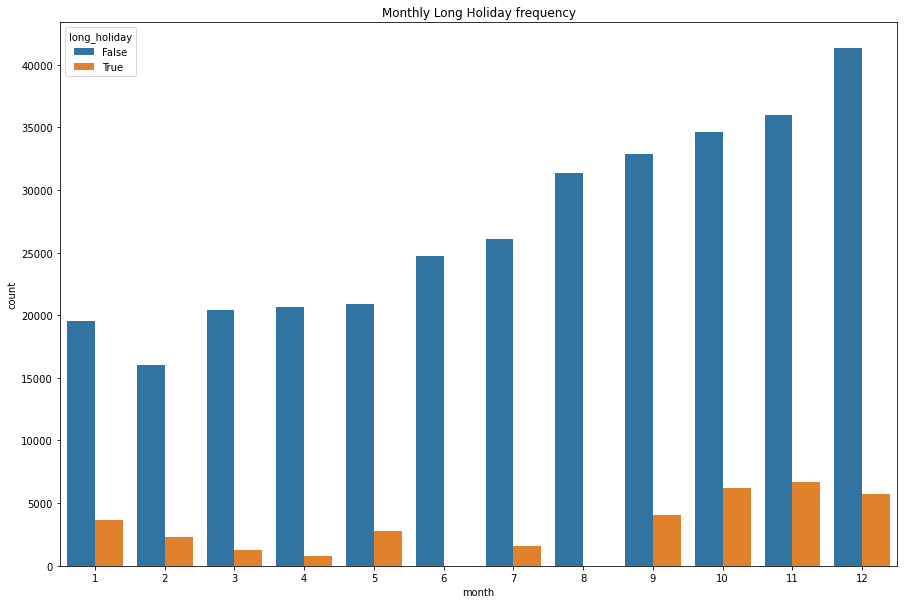

In [73]:
fig, ax= plt.subplots(figsize=(15,10))

ax = sns.countplot(x='month', data=taxi, hue='long_holiday').set_title("Monthly Long Holiday frequency")

## What is the monthly school break frequency?

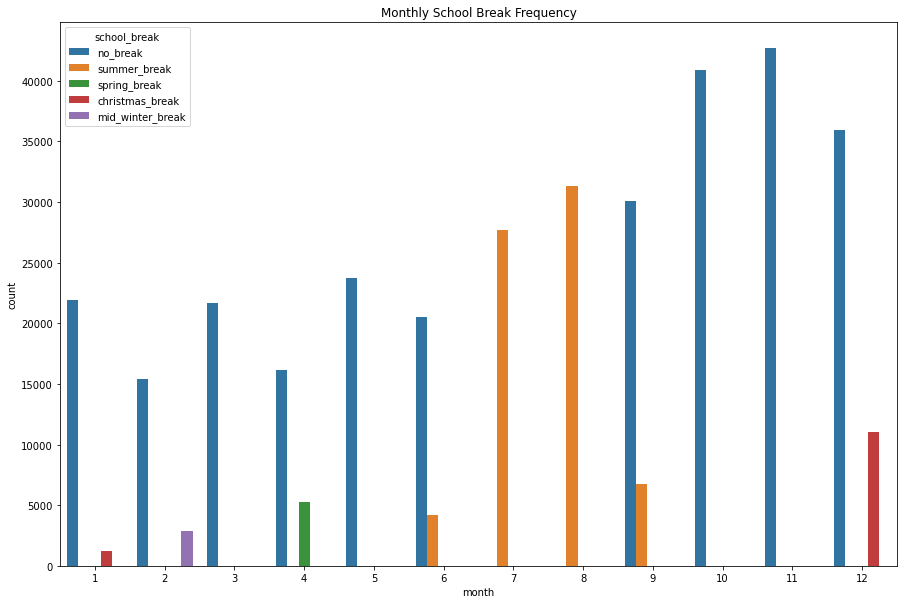

In [74]:
fig, ax= plt.subplots(figsize=(15,10))

ax = sns.countplot(x='month', data=taxi, hue='school_break').set_title("Monthly School Break Frequency")

## What is the frequency of trips per year for each company?

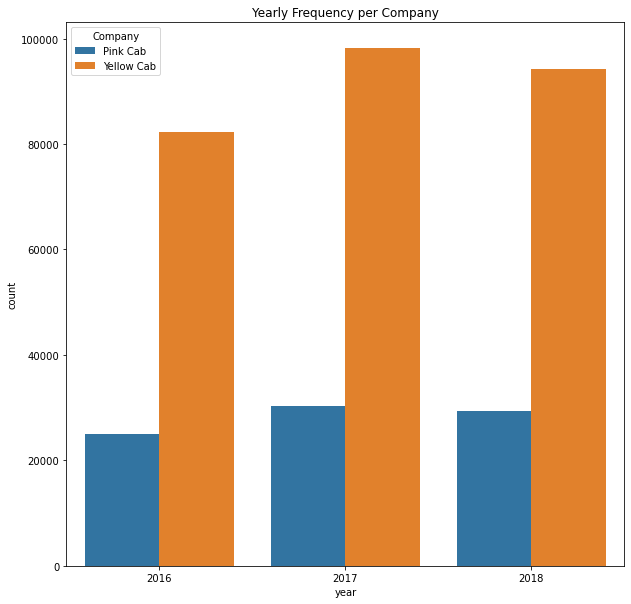

In [75]:
fig, ax= plt.subplots(figsize=(10,10))

ax = sns.countplot(x='year', data=taxi, hue='Company').set_title("Yearly Frequency per Company")

## What is the yearly weekend frequency?

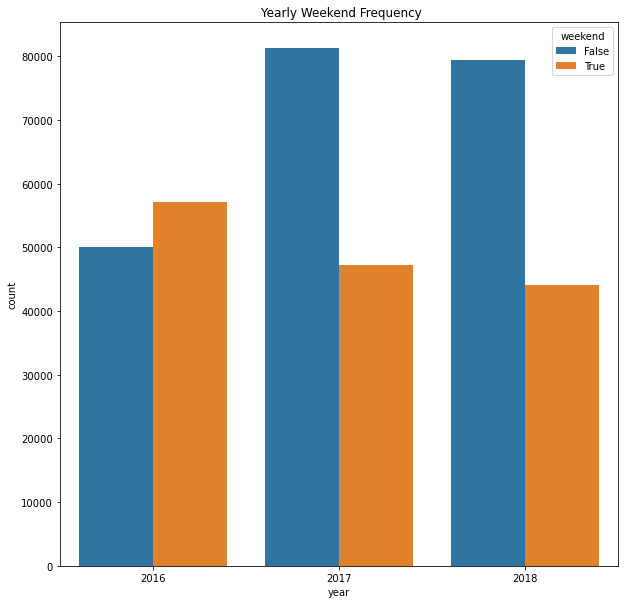

In [76]:
fig, ax= plt.subplots(figsize=(10,10))

ax = sns.countplot(x='year', data=taxi, hue='weekend').set_title(" Yearly Weekend Frequency")

## What is yearly holiday frequency?

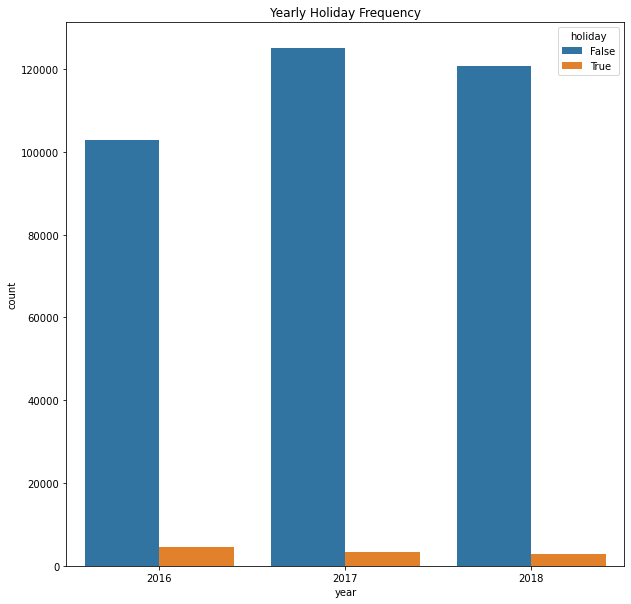

In [77]:
fig, ax= plt.subplots(figsize=(10,10))

ax = sns.countplot(x='year', data=taxi, hue='holiday').set_title("Yearly Holiday Frequency")

## What is the yearly long holiday frequency?

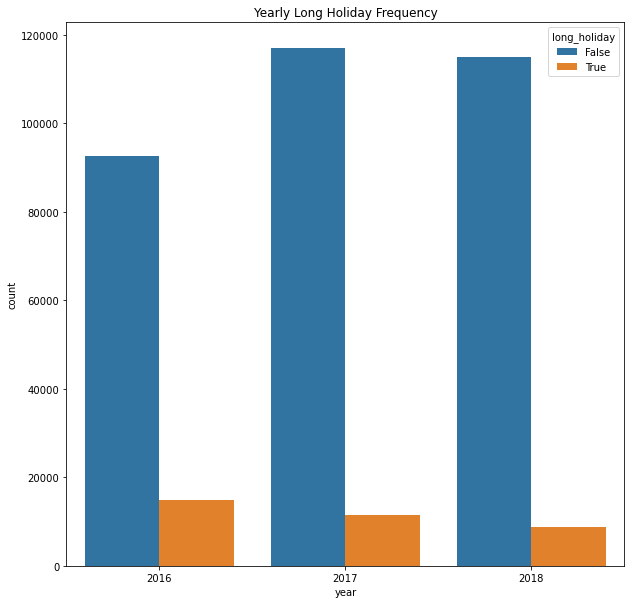

In [78]:
fig, ax= plt.subplots(figsize=(10,10))

ax = sns.countplot(x='year', data=taxi, hue='long_holiday').set_title("Yearly Long Holiday Frequency")

## What is the Yearly school break frequency?

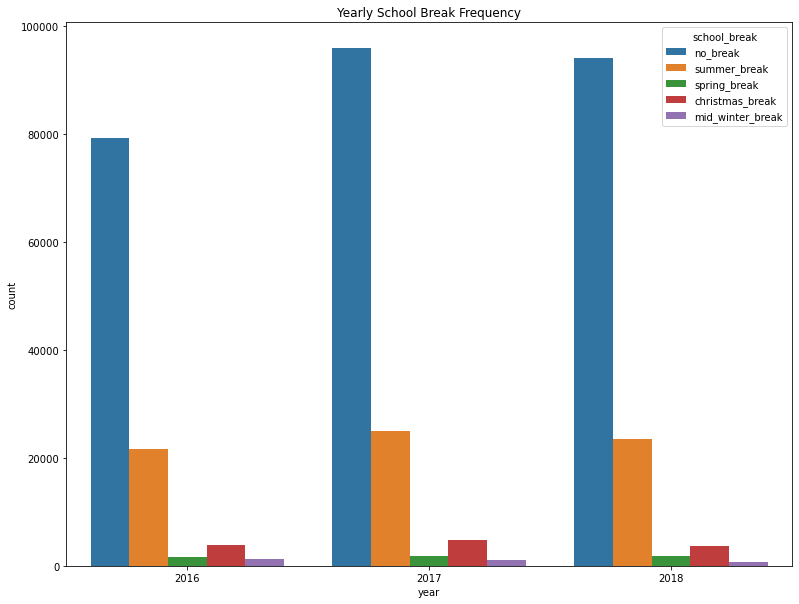

In [79]:
fig, ax= plt.subplots(figsize=(13,10))

ax = sns.countplot(x='year', data=taxi, hue='school_break').set_title("Yearly School Break Frequency")

# AGE Analysis

## What is the number of Transactions per age?

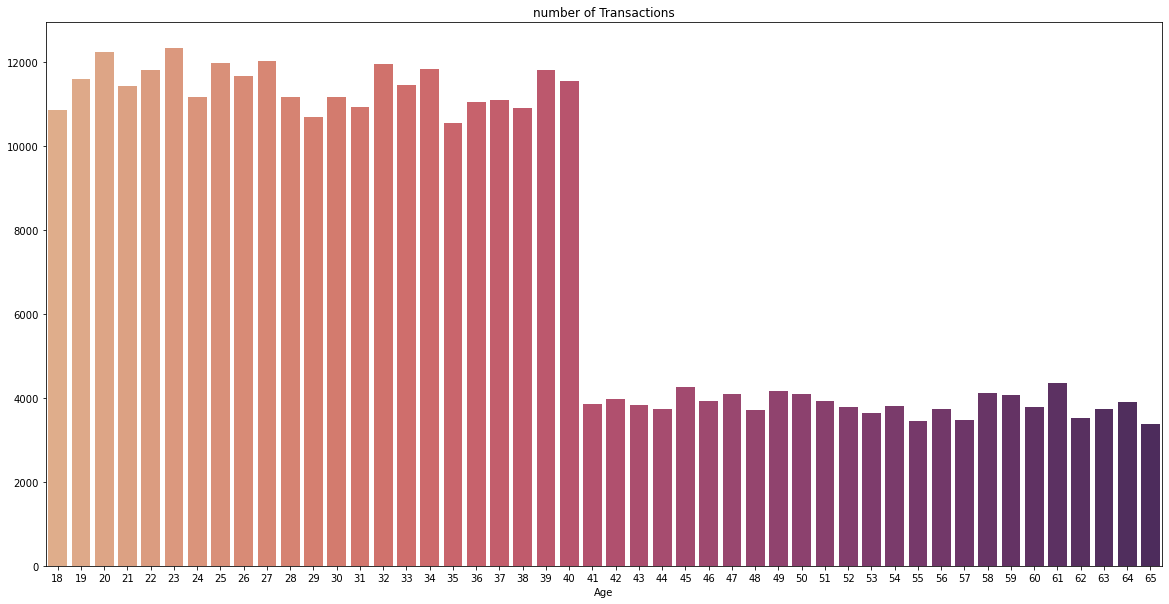

In [80]:
age = taxi.groupby('Age').TransactionID.count()

plt.figure(figsize=(20,10))
sns.barplot(x=age.index,y=age.values, palette='flare')
plt.xlabel('Age')
plt.title('number of Transactions')
plt.show()

## What is the weekend frequency by Age?

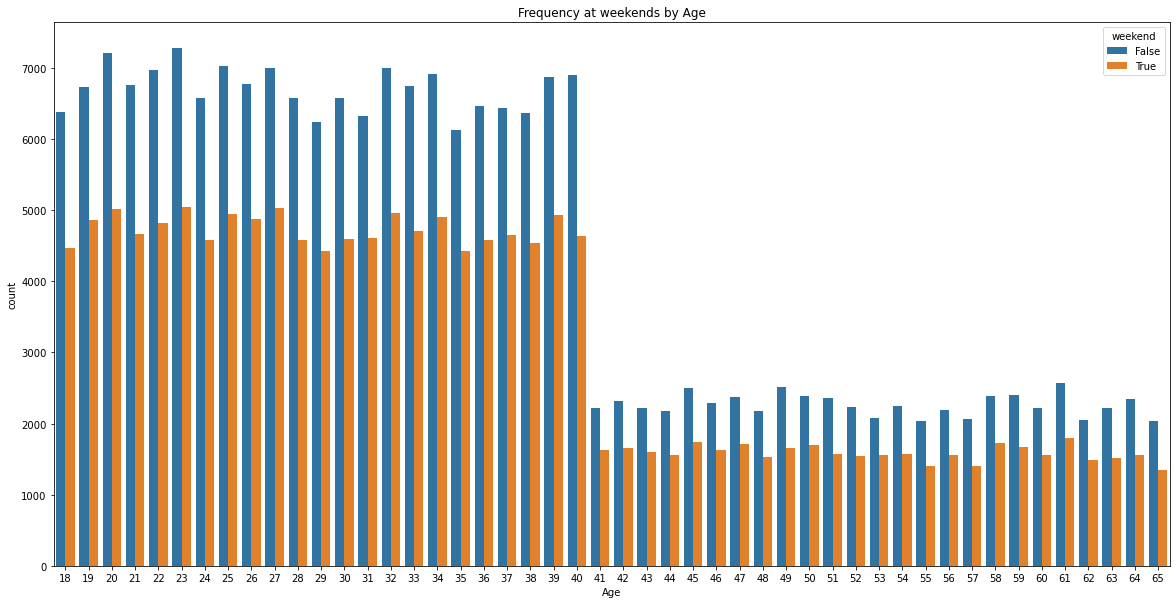

In [81]:
fig, ax= plt.subplots(figsize=(20,10))

ax = sns.countplot(x='Age', data=taxi, hue='weekend').set_title("Frequency at weekends by Age")

## What is the holiday frequency by age?

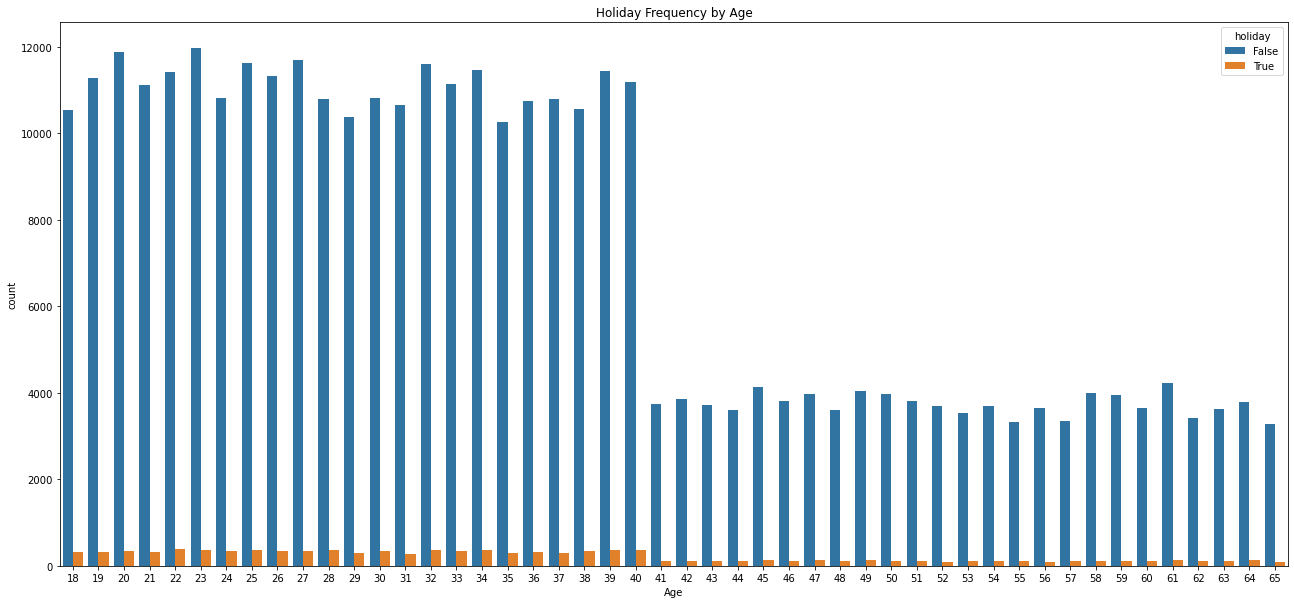

In [82]:
fig, ax= plt.subplots(figsize=(22,10))

ax = sns.countplot(x='Age', data=taxi, hue='holiday').set_title("Holiday Frequency by Age")

## What is the Long holiday frequency by age?

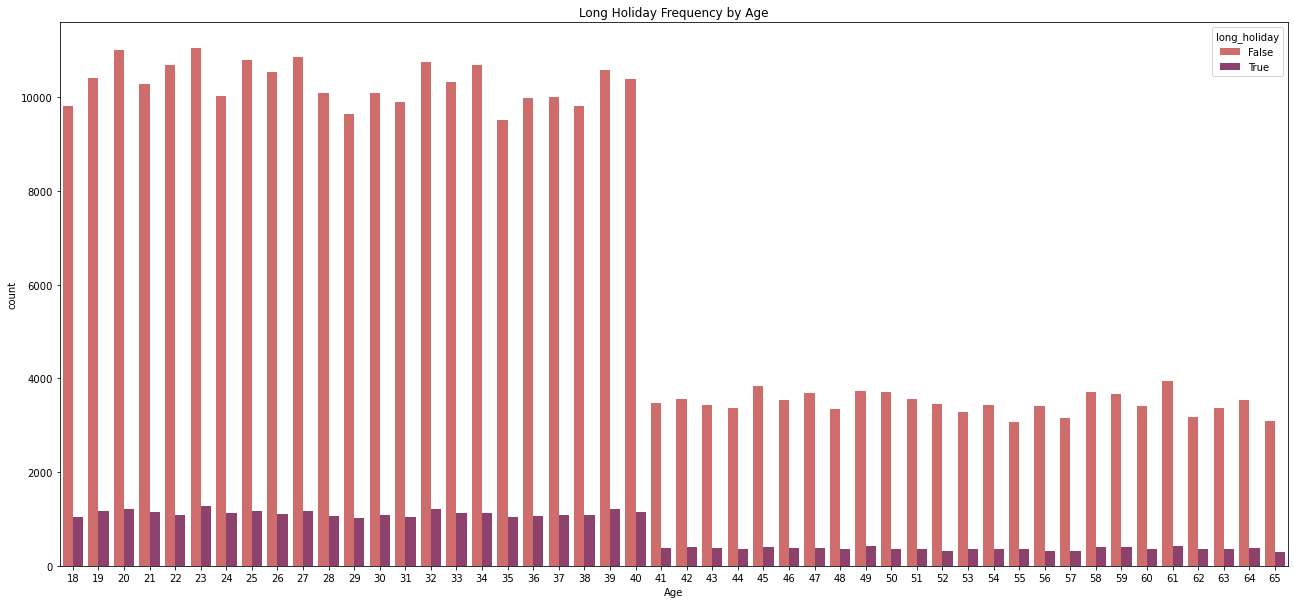

In [83]:
fig, ax= plt.subplots(figsize=(22,10))

ax = sns.countplot(x='Age', data=taxi, hue='long_holiday', palette='flare').set_title("Long Holiday Frequency by Age")

## What is the user`s average age by the company?

In [84]:
taxi.groupby('Company').Age.mean().round(0)

Company
Pink Cab      35.0
Yellow Cab    35.0
Name: Age, dtype: float64

## What is the age of the most frequent users by the City?

In [85]:
taxi.groupby(['City', 'Gender'])['Age'].value_counts().sort_values(ascending=False).head(20)

City         Gender  Age
NEW YORK NY  Male    36     2372
                     23     2367
                     20     2192
                     33     2177
                     27     2132
                     21     2106
                     34     2100
                     25     2081
                     22     2060
                     38     1991
                     18     1952
                     26     1944
                     35     1863
                     32     1854
                     40     1805
                     28     1779
                     39     1726
             Female  27     1718
             Male    31     1715
                     24     1709
Name: Age, dtype: int64

## Because it has a considerable difference for over 40`s users, What is the Percentage of these two groups?

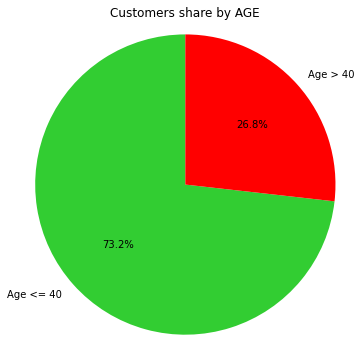

In [86]:
labels = 'Age <= 40','Age > 40'
col = ('limegreen','red')
pct = [age[age.index<=40].values.sum(),age[age.index>40].values.sum()]
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pct, labels=labels, autopct='%1.1f%%', startangle=90, colors=col)
ax.axis('equal')

plt.title('Customers share by AGE')
plt.show()

# What is the percentage of over 40`s users age by each Company?

In [87]:
age_per_company = taxi.groupby(['Company','Age','holiday', 'long_holiday','weekend']).CustomerID.agg(['nunique'])
age_per_company = age_per_company.reset_index()
age_per_company

,Company,Age,holiday,long_holiday,weekend,nunique
0,Pink Cab,18,False,False,False,781
1,Pink Cab,18,False,False,True,565
2,Pink Cab,18,False,True,True,180
3,Pink Cab,18,True,False,False,23
4,Pink Cab,18,True,True,False,29
...,...,...,...,...,...,...
571,Yellow Cab,65,False,False,True,275
572,Yellow Cab,65,False,True,True,119
573,Yellow Cab,65,True,False,False,29
574,Yellow Cab,65,True,True,False,34


# Over 40`s Pink Cab users

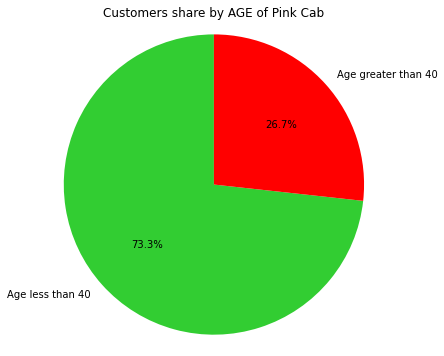

In [88]:
label = 'Age less than 40','Age greater than 40' 
pct = [age_per_company[(age_per_company.Age<=40) & (age_per_company.Company=='Pink Cab')]['nunique'].sum(),age_per_company[(age_per_company.Age>40) & (age_per_company.Company=='Pink Cab')]['nunique'].sum() ]

col = ('limegreen','red')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pct , labels=label, autopct='%1.1f%%', startangle=90, colors=col)
ax.axis('equal')

plt.title('Customers share by AGE of Pink Cab')
plt.show()

# Over 40`s Yellow Cab users

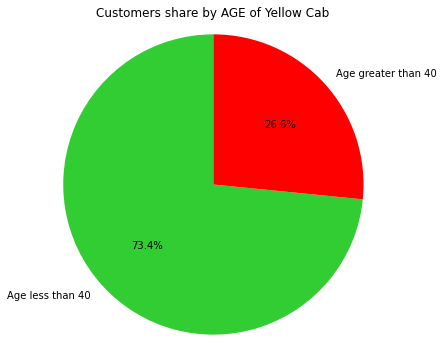

In [89]:
label = 'Age less than 40','Age greater than 40' 
pct = [age_per_company[(age_per_company.Age<=40) & (age_per_company.Company=='Yellow Cab')]['nunique'].sum(),age_per_company[(age_per_company.Age>40) & (age_per_company.Company=='Yellow Cab')]['nunique'].sum() ]
col = ('limegreen','red')

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pct , labels=label, autopct='%1.1f%%',startangle=90, colors=col)
ax.axis('equal')

plt.title('Customers share by AGE of Yellow Cab')
plt.show()

## What is the customer share on holidays by age?

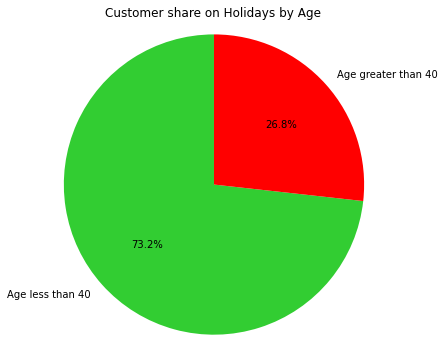

In [90]:
label = 'Age less than 40','Age greater than 40' 
pct = [age_per_company[(age_per_company.Age<=40) & (age_per_company.holiday==True)]['nunique'].sum(),age_per_company[(age_per_company.Age>40) & (age_per_company.holiday==True)]['nunique'].sum() ]
col = ('limegreen','red')

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pct , labels=label, autopct='%1.1f%%',startangle=90, colors=col)
ax.axis('equal')

plt.title('Customer share on Holidays by Age')
plt.show()

## What is the customer share at weekends by age?

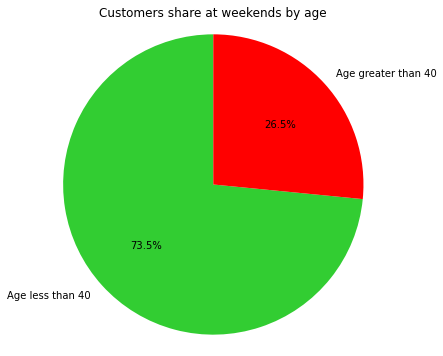

In [91]:
label = 'Age less than 40','Age greater than 40' 
pct = [age_per_company[(age_per_company.Age<=40) & (age_per_company.weekend==True)]['nunique'].sum(),age_per_company[(age_per_company.Age>40) & (age_per_company.weekend==True)]['nunique'].sum() ]
col = ('limegreen','red')

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pct , labels=label, autopct='%1.1f%%',startangle=90, colors=col)
ax.axis('equal')

plt.title('Customers share at weekends by age')
plt.show()

# What is the customer share on long holidays by age?

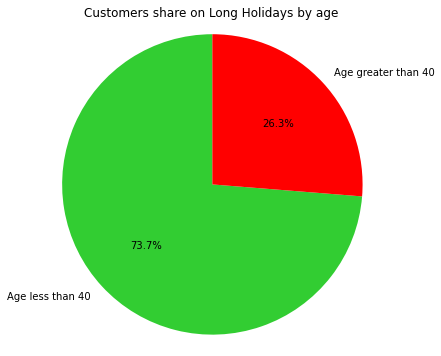

In [92]:
label = 'Age less than 40','Age greater than 40' 
pct = [age_per_company[(age_per_company.Age<=40) & (age_per_company.long_holiday == True)]['nunique'].sum(),age_per_company[(age_per_company.Age>40) & (age_per_company.long_holiday==True)]['nunique'].sum() ]
col = ('limegreen','red')

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pct , labels=label, autopct='%1.1f%%',startangle=90, colors=col)
ax.axis('equal')

plt.title('Customers share on Long Holidays by age')
plt.show()

# What is the Customer Share Market each year?

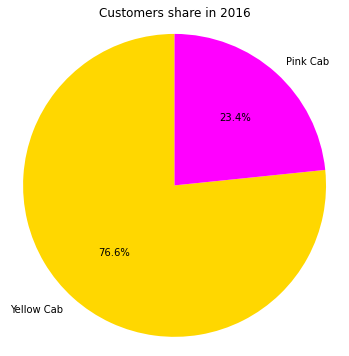

In [93]:
label = 'Yellow Cab','Pink Cab' 
data = [taxi[(taxi.year==2016) & (taxi.Company=='Yellow Cab')]['CustomerID'].count(),taxi[(taxi.year==2016) & (taxi.Company=='Pink Cab')]['CustomerID'].count() ]
col =('gold','magenta')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('Customers share in 2016')
plt.show()

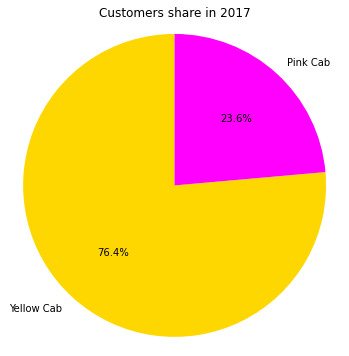

In [94]:
label = 'Yellow Cab','Pink Cab' 
data = [taxi[(taxi.year==2017) & (taxi.Company=='Yellow Cab')]['CustomerID'].count(),taxi[(taxi.year==2017) & (taxi.Company=='Pink Cab')]['CustomerID'].count() ]
col =('gold','magenta')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('Customers share in 2017')
plt.show()

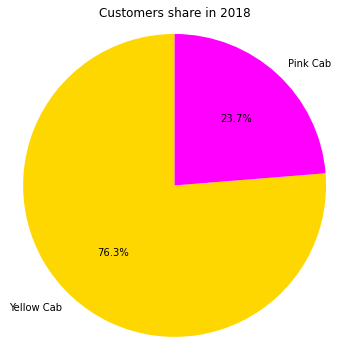

In [95]:
label = 'Yellow Cab','Pink Cab' 
data = [taxi[(taxi.year==2018) & (taxi.Company=='Yellow Cab')]['CustomerID'].count(),taxi[(taxi.year==2018) & (taxi.Company=='Pink Cab')]['CustomerID'].count() ]
col =('gold','magenta')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('Customers share in 2018')
plt.show()

# What is the Percentage of Kilometres travelled each year?

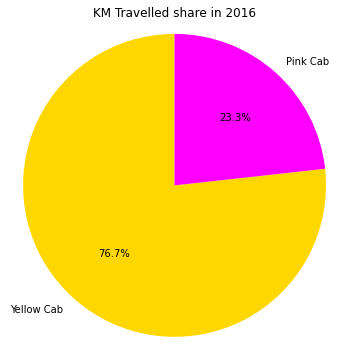

In [96]:
label = 'Yellow Cab','Pink Cab' 
data = [taxi[(taxi.year==2016) & (taxi.Company=='Yellow Cab')]['KM_Travelled'].sum(),taxi[(taxi.year==2016) & (taxi.Company=='Pink Cab')]['KM_Travelled'].sum() ]
col =('gold','magenta')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('KM Travelled share in 2016')
plt.show()

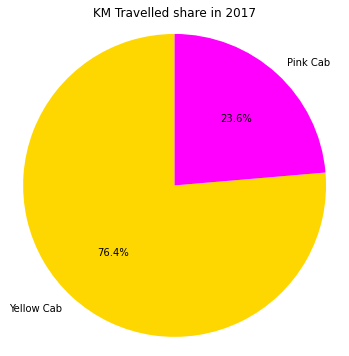

In [97]:
label = 'Yellow Cab','Pink Cab' 
data = [taxi[(taxi.year==2017) & (taxi.Company=='Yellow Cab')]['KM_Travelled'].sum(),taxi[(taxi.year==2017) & (taxi.Company=='Pink Cab')]['KM_Travelled'].sum() ]
col =('gold','magenta')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('KM Travelled share in 2017')
plt.show()

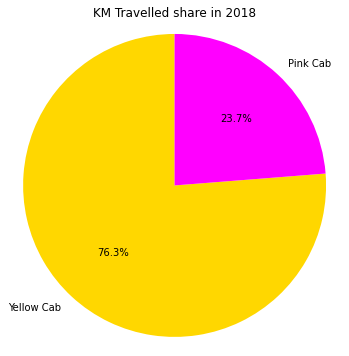

In [98]:
label = 'Yellow Cab','Pink Cab' 
data = [taxi[(taxi.year==2018) & (taxi.Company=='Yellow Cab')]['KM_Travelled'].sum(),taxi[(taxi.year==2018) & (taxi.Company=='Pink Cab')]['KM_Travelled'].sum() ]
col =('gold','magenta')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('KM Travelled share in 2018')
plt.show()

## What is the percentage of KM Travelled share at Weekends by year?

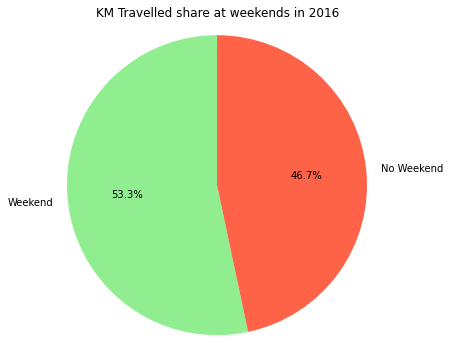

In [99]:
label = 'Weekend','No Weekend' 
data = [taxi[(taxi.year==2016) & (taxi.weekend==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2016) & (taxi.weekend==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('KM Travelled share at weekends in 2016')
plt.show()

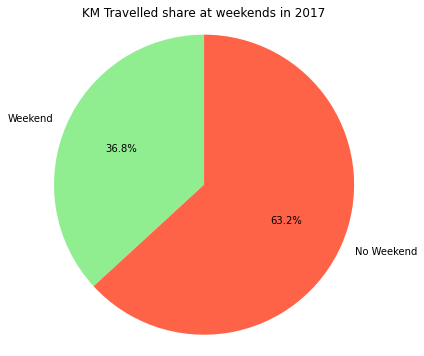

In [100]:
label = 'Weekend','No Weekend' 
data = [taxi[(taxi.year==2017) & (taxi.weekend==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2017) & (taxi.weekend==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('KM Travelled share at weekends in 2017')
plt.show()

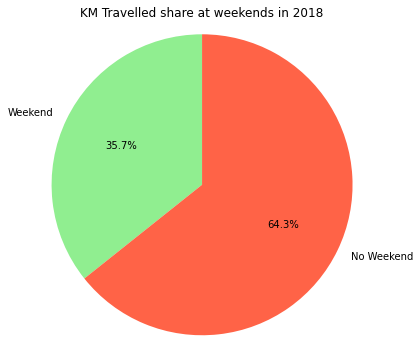

In [101]:
label = 'Weekend','No Weekend' 
data = [taxi[(taxi.year==2018) & (taxi.weekend==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2018) & (taxi.weekend==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=90,colors=col)
ax.axis('equal')

plt.title('KM Travelled share at weekends in 2018')
plt.show()

## What is the percentage of KM Travelled share on holidays by year?

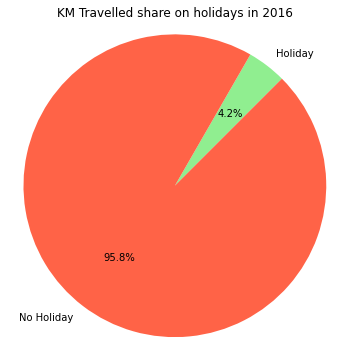

In [102]:
label = 'Holiday','No Holiday' 
data = [taxi[(taxi.year==2016) & (taxi.holiday==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2016) & (taxi.holiday==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=45,colors=col)
ax.axis('equal')

plt.title('KM Travelled share on holidays in 2016')
plt.show()

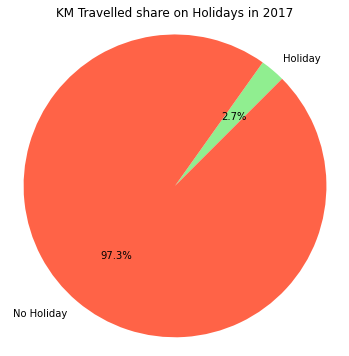

In [103]:
label = 'Holiday','No Holiday' 
data = [taxi[(taxi.year==2017) & (taxi.holiday==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2017) & (taxi.holiday==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=45,colors=col)
ax.axis('equal')

plt.title('KM Travelled share on Holidays in 2017')
plt.show()

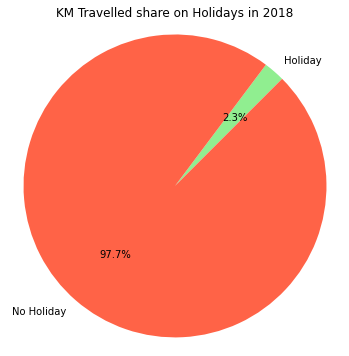

In [104]:
label = 'Holiday','No Holiday' 
data = [taxi[(taxi.year==2018) & (taxi.holiday==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2018) & (taxi.holiday==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=45,colors=col)
ax.axis('equal')

plt.title('KM Travelled share on Holidays in 2018')
plt.show()

## What is the percentage of KM Travelled share on Long Holidays by year?

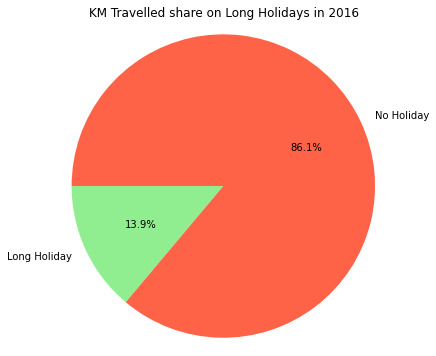

In [105]:
label = 'Long Holiday','No Holiday' 
data = [taxi[(taxi.year==2016) & (taxi.long_holiday==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2016) & (taxi.long_holiday==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=180,colors=col)
ax.axis('equal')

plt.title('KM Travelled share on Long Holidays in 2016')
plt.show()

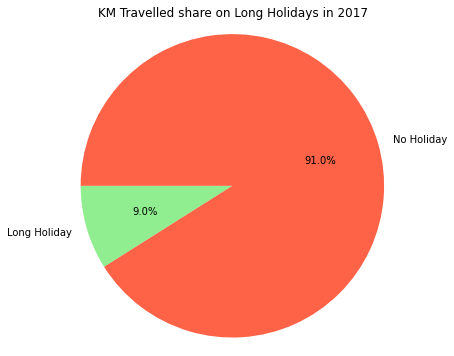

In [106]:
label = 'Long Holiday','No Holiday' 
data = [taxi[(taxi.year==2017) & (taxi.long_holiday==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2017) & (taxi.long_holiday==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=180,colors=col)
ax.axis('equal')

plt.title('KM Travelled share on Long Holidays in 2017')
plt.show()

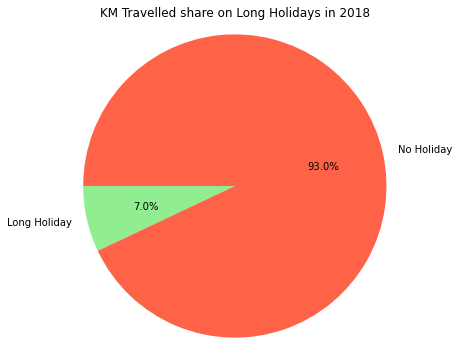

In [107]:
label = 'Long Holiday','No Holiday' 
data = [taxi[(taxi.year==2018) & (taxi.long_holiday==True)]['KM_Travelled'].sum(),taxi[(taxi.year==2018) & (taxi.long_holiday==False)]['KM_Travelled'].sum() ]
col =('lightgreen','tomato')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data , labels=label, autopct='%1.1f%%', startangle=180,colors=col)
ax.axis('equal')

plt.title('KM Travelled share on Long Holidays in 2018')
plt.show()

## What is the Frequency by Holiday name?

In [108]:
taxi['holiday_name'].value_counts()

FALSE                                    346034
Christmas Eve                              2011
New Year                                   1786
Veterans Day                               1565
Christmas Day                              1331
Good Friday                                1170
Thanksgiving Day                           1166
Halloween                                   814
Columbus Day                                673
Labor Day                                   666
New Year Day                                610
Memorial Day                                449
Independence Day                            447
Presidents Day (Washingtons Birthday)       345
Martin Luther King Jr. Day                  325
Name: holiday_name, dtype: int64

# Analysing Margins

In [109]:
taxi['Margins'] = (taxi['Price_Charged']-taxi['Cost_of_Trip'])

In [110]:
taxi_df = taxi[['KM_Travelled','Price_Charged','Cost_of_Trip','month','year','Age','Income','Margins']]
taxi_df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,month,year,Age,Income,Margins
KM_Travelled,1.000000,0.835753,0.981848,-0.001903,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.061116,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008370,-0.001773,-0.000189,-0.000633,0.486056
month,-0.001903,-0.061116,-0.008370,1.000000,-0.030490,-0.002226,0.000322,-0.096352
year,-0.001072,-0.036409,-0.001773,-0.030490,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.002226,-0.000579,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,0.000322,-0.001617,0.003907,1.000000,0.006148
Margins,0.462768,0.864154,0.486056,-0.096352,-0.060567,-0.005093,0.006148,1.000000


<AxesSubplot:>

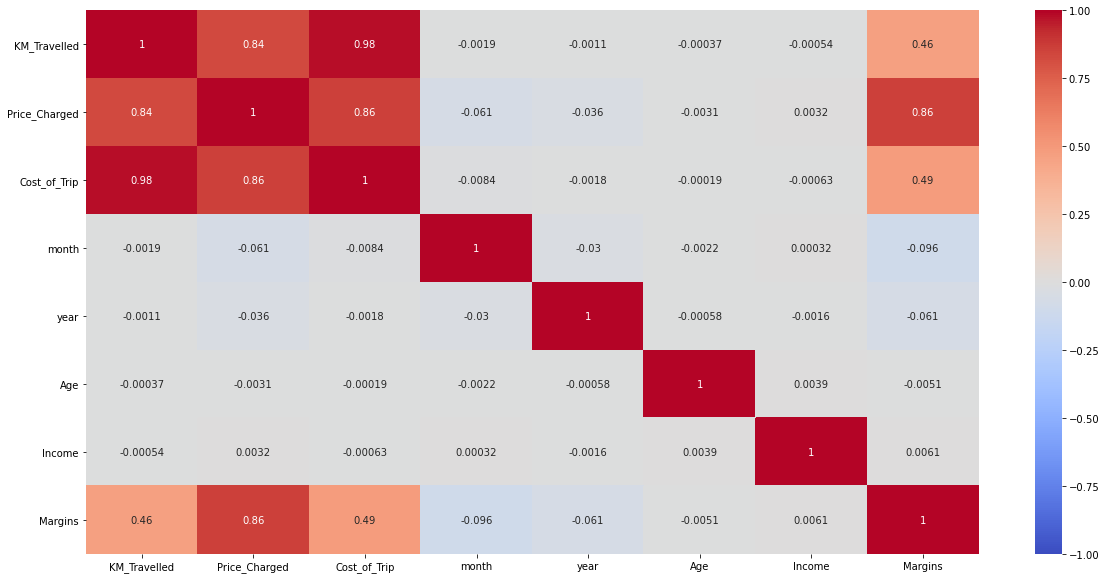

In [111]:
plt.figure(figsize=(20,10))
sns.heatmap(taxi_df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

## What is the average Margin per company by gender?

In [112]:
taxi.groupby(['Gender','Company']).Margins.mean().sort_values(ascending=False).round(2)

Gender  Company   
Male    Yellow Cab    163.15
Female  Yellow Cab    156.31
Male    Pink Cab       63.03
Female  Pink Cab       62.18
Name: Margins, dtype: float64

# What is the most frequent city in our dataset?

4420328


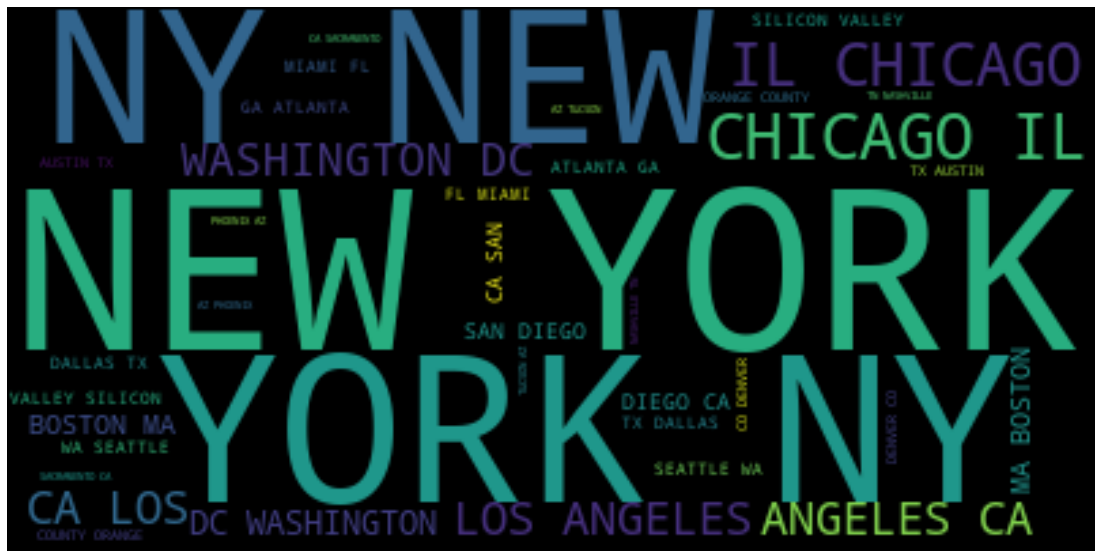

In [113]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(review for review in taxi.City)
print(len(text))
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# RFM Customer Segmentation

The old RFM matrix principle is the best to find out who the best customers are. RFM stands for Recency, Frequency and Monetary. It is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

## RFM Score Calculations

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent

Let`s find out the last order date in the data:

In [114]:
taxi['Date_of_Travel'].max()

Timestamp('2018-12-31 00:00:00')

### Since recency is calculated for a point in time, and the last invoice date is 2018-12-31, we will use 2019–1–1 to calculate recency.

In [115]:
import datetime as dt
NOW = dt.datetime(2019,1,1)
taxi['Date_of_Travel'] = pd.to_datetime(taxi['Date_of_Travel'])

### Create a RFM table

In [116]:
rfmTable = taxi.groupby('CustomerID').agg({'Date_of_Travel': lambda x: (NOW - x.max()).days, 'TransactionID': lambda x: len(x), 'Price_Charged': lambda x: x.sum()})
rfmTable['Date_of_Travel'] = rfmTable['Date_of_Travel'].astype(int)
rfmTable.rename(columns={'Date_of_Travel': 'recency', 
                         'TransactionID': 'frequency', 
                         'Price_Charged': 'monetary_value'}, inplace=True)

In [117]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
1,16,29,17490.13
2,16,40,23992.86
3,10,46,24828.35
4,17,26,16308.55
5,3,31,19310.97


### Interpretation:

- CustomerID 1 has frequency: 29, monetary value: 17490.13 and recency: 16 days.

- CustomerID 2 has frequency: 40, monetary value: 23992.86 and recency: 16 days

Let’s check the details of the first customer.

In [118]:
first_customer = taxi[taxi['CustomerID'] == 1]
first_customer.head(1)

,TransactionID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,CustomerID,...,day,weekday,month,year,holiday_name,holiday,weekend,long_holiday,school_break,Margins
208061,10008434,2016-02-06,Yellow Cab,NEW YORK NY,42.48,1422.3,576.0288,"8,405,837","302,149",1,...,6,5,2,2016,FALSE,False,True,False,no_break,846.2712


### Split the metrics

The easiest way to split metrics into segments is by using quartiles.

- This gives us a starting point for the detailed analysis.
- 4 segments are easy to understand and explain.

In [119]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

### Create a segmented RFM table

In [120]:
segmented_rfm = rfmTable

In [121]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

### Add segment numbers to the newly created segmented RFM table

In [122]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
1,16,29,17490.13,1,1,1
2,16,40,23992.86,1,1,1
3,10,46,24828.35,1,1,1
4,17,26,16308.55,1,1,1
5,3,31,19310.97,1,1,1


### Add a new column to combine RFM score: 111 is the highest score as we determined earlier.

In [123]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
1,16,29,17490.13,1,1,1,111
2,16,40,23992.86,1,1,1,111
3,10,46,24828.35,1,1,1,111
4,17,26,16308.55,1,1,1,111
5,3,31,19310.97,1,1,1,111


# Who are the top 10 of the best customers!

In [124]:
top_10 = segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)
top_10

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
126,14,50,33857.12,1,1,1,111
205,8,48,31936.69,1,1,1,111
336,6,48,31640.23,1,1,1,111
1803,2,50,31561.21,1,1,1,111
1445,25,41,31102.99,1,1,1,111
903,2,50,30791.55,1,1,1,111
494,10,54,30700.95,1,1,1,111
1360,4,49,30457.24,1,1,1,111
972,4,47,30192.42,1,1,1,111


In [125]:
for i in top_10.index:
    print(taxi[taxi['CustomerID'] == i][['City','Gender','Age','Income','Company']].value_counts())

City         Gender  Age  Income  Company   
NEW YORK NY  Female  18   10637   Yellow Cab    45
                                  Pink Cab       5
dtype: int64
City         Gender  Age  Income  Company   
NEW YORK NY  Female  65   18700   Yellow Cab    43
                                  Pink Cab       5
dtype: int64
City         Gender  Age  Income  Company   
NEW YORK NY  Male    22   8899    Yellow Cab    40
                                  Pink Cab       8
dtype: int64
City         Gender  Age  Income  Company   
NEW YORK NY  Male    38   19204   Yellow Cab    47
                                  Pink Cab       3
dtype: int64
City         Gender  Age  Income  Company   
NEW YORK NY  Male    23   14431   Yellow Cab    37
                                  Pink Cab       4
dtype: int64
City         Gender  Age  Income  Company   
NEW YORK NY  Female  60   6147    Yellow Cab    45
                                  Pink Cab       5
dtype: int64
City         Gender  Age  Income  Compan

# Top 10 customers Result:

Although, there are a massive number of males over females, the first two best customers are females and the top 10 are all from New York City, which use mostly the Yellow Cab.
I will implement some T-TEST to checking whether Yellow Cab decreased the margings for females.

# T TEST to check some hypothesis.

In [126]:
from scipy import stats

def t_test(a,b):
    _, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
    if(p_value<0.05):
        print('"\033[1m" We accept alternate hypothesis that there is a statistical difference')
    else:
        print('We accept null hypothesis that there is no statistical difference')
    
    print('P value is ', p_value)

## Yellow Cab Hypothesis.

##### Is there any statistical difference between Yellow Cab`s margins and gender?

In [127]:
a = taxi[(taxi.Gender=='Female')&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Gender=='Male')&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  116000 158681
"" We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


### Is there any statistical difference between Yellow Cab`s margins and the weekends?

In [128]:
a = taxi[(taxi.weekend==True)&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.weekend==False)&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  113816 160865
"" We accept alternate hypothesis that there is a statistical difference
P value is  1.0100099360545467e-271


### Is there any statistical difference between Yellow Cab`s margins and holidays?

In [129]:
a = taxi[(taxi.holiday==True)&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.holiday==False)&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  8110 266571
"" We accept alternate hypothesis that there is a statistical difference
P value is  0.0001028929610003901


### Is there any statistical difference between Yellow Cab`s margins and long holidays?

In [130]:
a = taxi[(taxi.long_holiday==True)&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.long_holiday==False)&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  26698 247983
"" We accept alternate hypothesis that there is a statistical difference
P value is  5.460512770577579e-29


## Pink Cab Hypothesis.

### Is there any statistical difference between Pink Cab`s margins and gender?

In [131]:
a = taxi[(taxi.Gender=='Female')&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Gender=='Male')&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ",a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  37480 47231
We accept null hypothesis that there is no statistical difference
P value is  0.11515305900425798


### Is there any statistical difference between Pink Cab`s margins and the weekends?

In [132]:
a = taxi[(taxi.weekend==True)&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.weekend==False)&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  34728 49983
"" We accept alternate hypothesis that there is a statistical difference
P value is  1.7902851800156977e-207


### Is there any statistical difference between Pink Cab`s margins and the holidays?

In [133]:
a = taxi[(taxi.holiday==True)&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.holiday==False)&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  2563 82148
"" We accept alternate hypothesis that there is a statistical difference
P value is  1.047165726969287e-27


### Is there any statistical difference between Pink Cab`s margins and long holidays?

In [134]:
a = taxi[(taxi.long_holiday==True)&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.long_holiday==False)&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  8332 76379
"" We accept alternate hypothesis that there is a statistical difference
P value is  4.07063955507133e-89


### Is there any statistical difference between Yellow Cab KM travelled and the gender?

In [135]:
a = taxi[(taxi.Gender=='Female')&(taxi.Company=='Yellow Cab')].groupby('TransactionID').KM_Travelled.mean()
b = taxi[(taxi.Gender=='Male')&(taxi.Company=='Yellow Cab')].groupby('TransactionID').KM_Travelled.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  116000 158681
We accept null hypothesis that there is no statistical difference
P value is  0.5146654429411317


### Is there any statistical difference between Pink Cab KM travelled and the gender?

In [136]:
a = taxi[(taxi.Gender=='Female')&(taxi.Company=='Pink Cab')].groupby('TransactionID').KM_Travelled.mean()
b = taxi[(taxi.Gender=='Male')&(taxi.Company=='Pink Cab')].groupby('TransactionID').KM_Travelled.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  37480 47231
We accept null hypothesis that there is no statistical difference
P value is  0.6164626165258722


### Is there any statistical difference between Pink Cab KM travelled and weekend?

In [137]:
a = taxi[(taxi.weekend==True)&(taxi.Company=='Pink Cab')].groupby('TransactionID').KM_Travelled.mean()
b = taxi[(taxi.weekend==False)&(taxi.Company=='Pink Cab')].groupby('TransactionID').KM_Travelled.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  34728 49983
We accept null hypothesis that there is no statistical difference
P value is  0.1445464681745323


### Is there any statistical difference between Pink Cab KM travelled and holiday?

In [138]:
a = taxi[(taxi.holiday==True)&(taxi.Company=='Pink Cab')].groupby('TransactionID').KM_Travelled.mean()
b = taxi[(taxi.holiday==False)&(taxi.Company=='Pink Cab')].groupby('TransactionID').KM_Travelled.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  2563 82148
We accept null hypothesis that there is no statistical difference
P value is  0.05569558801607129


### Is there any statistical difference between Pink Cab KM travelled and long holiday?

In [139]:
a = taxi[(taxi.long_holiday==True)&(taxi.Company=='Pink Cab')].groupby('TransactionID').KM_Travelled.mean()
b = taxi[(taxi.long_holiday==False)&(taxi.Company=='Pink Cab')].groupby('TransactionID').KM_Travelled.mean()
print("This is the shape: ", a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  8332 76379
We accept null hypothesis that there is no statistical difference
P value is  0.5598133664384136


### Is there any statistical difference between Pink Cab`s Margins and either over 45 or below 45 years old?

In [140]:
a = taxi[(taxi.Age<=45)&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Age>45)&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ",a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  66628 18083
We accept null hypothesis that there is no statistical difference
P value is  0.40340123944148865


### Is there any statistical difference between Yellow Cab`s Margins and either over 45 or below 45 years old?

In [141]:
a = taxi[(taxi.Age<=45)&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Age>45)&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
print("This is the shape: ",a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  216128 58553
"" We accept alternate hypothesis that there is a statistical difference
P value is  0.027917813927287476


### Is there any statistical difference between the weekends` margins for either over 45 or below 45 years old?

In [142]:
a = taxi[(taxi.Age<=45)&(taxi.weekend==True)].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Age>45)&(taxi.weekend==False)].groupby('TransactionID').Margins.mean()
print("This is the shape: ",a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  117059 45151
"" We accept alternate hypothesis that there is a statistical difference
P value is  2.853120346263822e-147


### Is there any Statistical difference between the holiday`s margins for either over 45 or below 45 years old?

In [143]:
a = taxi[(taxi.Age<=45)&(taxi.holiday==True)].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Age>45)&(taxi.holiday==False)].groupby('TransactionID').Margins.mean()
print("This is the shape: ",a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  8382 74345
We accept null hypothesis that there is no statistical difference
P value is  0.831844720047637


### Is there any statistical difference between long holidays margins for either over 45 or below 45 years old?

In [144]:
a = taxi[(taxi.Age<=45)&(taxi.long_holiday==True)].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Age>45)&(taxi.long_holiday==False)].groupby('TransactionID').Margins.mean()
print("This is the shape: ",a.shape[0],b.shape[0])
t_test(a,b)

This is the shape:  27747 69353
"" We accept alternate hypothesis that there is a statistical difference
P value is  7.003434016105866e-40


### Is there a difference in  Pink Cab`s margins for Card  and Cash payers?

In [145]:
a = taxi[(taxi.Payment_Mode=='Cash')&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Payment_Mode=='Card')&(taxi.Company=='Pink Cab')].groupby('TransactionID').Margins.mean()
t_test(a,b)

We accept null hypothesis that there is no statistical difference
P value is  0.7900465828793288


### Is there a difference in Yellow Cab`s margins for Card and Cash payers?

In [146]:
a = taxi[(taxi.Payment_Mode=='Cash')&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Payment_Mode=='Card')&(taxi.Company=='Yellow Cab')].groupby('TransactionID').Margins.mean()
t_test(a,b)

We accept null hypothesis that there is no statistical difference
P value is  0.29330606382985325


### Is there a difference in Margins at weekends for Card and Cash payers?

In [147]:
a = taxi[(taxi.Payment_Mode=='Cash')&(taxi.weekend==True)].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Payment_Mode=='Card')&(taxi.weekend==False)].groupby('TransactionID').Margins.mean()
t_test(a,b)

"" We accept alternate hypothesis that there is a statistical difference
P value is  1.2447812101584752e-177


### Is there a difference in Margins on holidays for Card and Cash payers?

In [148]:
a = taxi[(taxi.Payment_Mode=='Cash')&(taxi.holiday==True)].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Payment_Mode=='Card')&(taxi.holiday==False)].groupby('TransactionID').Margins.mean()
t_test(a,b)

We accept null hypothesis that there is no statistical difference
P value is  0.23826563055276465


### Is there a difference in Margins on long holdays for Card and Cash payers?

In [149]:
a = taxi[(taxi.Payment_Mode=='Cash')&(taxi.long_holiday==True)].groupby('TransactionID').Margins.mean()
b = taxi[(taxi.Payment_Mode=='Card')&(taxi.long_holiday==False)].groupby('TransactionID').Margins.mean()
t_test(a,b)

"" We accept alternate hypothesis that there is a statistical difference
P value is  7.075142380243832e-21


In [150]:
def ttest(a,b,c):
    _, p_value = stats.f_oneway(a.values, b.values,c.values)
    p_value
    if(p_value<0.05):
        print('"\033[1m" We accept alternate hypothesis that there is a statistical difference')
    else:
        print(' We accept null hypothesis that there is no statistical difference')
    
    print('P value is ', p_value)

### Is there a difference for Female Yellow Cab users in any year?

In [151]:
a = taxi[(taxi.Gender=='Female')&(taxi.Company=='Yellow Cab')&(taxi.year==2016)].groupby('month').TransactionID.count()
b = taxi[(taxi.Gender=='Female')&(taxi.Company=='Yellow Cab')&(taxi.year==2017)].groupby('month').TransactionID.count()
c = taxi[(taxi.Gender=='Female')&(taxi.Company=='Yellow Cab')&(taxi.year==2018)].groupby('month').TransactionID.count()
ttest(a,b,c)

 We accept null hypothesis that there is no statistical difference
P value is  0.2639490556774863


### Is there a difference for Male Yellow Cab users in any year?

In [152]:
a = taxi[(taxi.Gender=='Male')&(taxi.Company=='Yellow Cab')&(taxi.year==2016)].groupby('month').TransactionID.count()
b = taxi[(taxi.Gender=='Male')&(taxi.Company=='Yellow Cab')&(taxi.year==2017)].groupby('month').TransactionID.count()
c = taxi[(taxi.Gender=='Male')&(taxi.Company=='Yellow Cab')&(taxi.year==2018)].groupby('month').TransactionID.count()
ttest(a,b,c)

 We accept null hypothesis that there is no statistical difference
P value is  0.4336915049689837


### Is there a difference for Female Pink Cab users in any year?

In [153]:
a = taxi[(taxi.Gender=='Female')&(taxi.Company=='Pink Cab')&(taxi.year==2016)].groupby('month').TransactionID.count()
b = taxi[(taxi.Gender=='Female')&(taxi.Company=='Pink Cab')&(taxi.year==2017)].groupby('month').TransactionID.count()
c = taxi[(taxi.Gender=='Female')&(taxi.Company=='Pink Cab')&(taxi.year==2018)].groupby('month').TransactionID.count()
ttest(a,b,c)

 We accept null hypothesis that there is no statistical difference
P value is  0.46855267304815296


### Is there a difference for Male Pink Cab users in any year?

In [154]:
a = taxi[(taxi.Gender=='Male')&(taxi.Company=='Pink Cab')&(taxi.year==2016)].groupby('month').TransactionID.count()
b = taxi[(taxi.Gender=='Male')&(taxi.Company=='Pink Cab')&(taxi.year==2017)].groupby('month').TransactionID.count()
c = taxi[(taxi.Gender=='Male')&(taxi.Company=='Pink Cab')&(taxi.year==2018)].groupby('month').TransactionID.count()
ttest(a,b,c)

 We accept null hypothesis that there is no statistical difference
P value is  0.5956004245723063


### Is there a difference in Transactions for Pink Cab in any year?

In [155]:
a = taxi[(taxi.Company=='Pink Cab')&(taxi.year==2016)].groupby('month').TransactionID.count()
b = taxi[(taxi.Company=='Pink Cab')&(taxi.year==2017)].groupby('month').TransactionID.count()
c = taxi[(taxi.Company=='Pink Cab')&(taxi.year==2018)].groupby('month').TransactionID.count()
ttest(a,b,c)

 We accept null hypothesis that there is no statistical difference
P value is  0.5322812268614807


### Is there a difference in Transactions for Yellow Cab in any year?

In [156]:
a = taxi[(taxi.Company=='Yellow Cab')&(taxi.year==2016)].groupby('month').TransactionID.count()
b = taxi[(taxi.Company=='Yellow Cab')&(taxi.year==2017)].groupby('month').TransactionID.count()
c = taxi[(taxi.Company=='Yellow Cab')&(taxi.year==2018)].groupby('month').TransactionID.count()
ttest(a,b,c)

 We accept null hypothesis that there is no statistical difference
P value is  0.3443534789183237


# Here is the Conclusion:

Although there are mostly male users, the top 2 are females who prefer the Yellow Cabs to the Pink ones.

I noticed how big is this market in New York City, with an average of 36-year-old businessmen users who occasionally travels for small distances.

The Cab industry itself is enormous in business cities like New York, Chicago, Los Angeles, Washington and Boston.

The Yellow cab has policies for charging less to older and female customers.

Yellow Cab dominates the industry, and I think it will not lose its monopoly so soon.

Pink Cab has a smaller Market Share than its opponent, but they are in big cities like Los Angeles, New York, San Diego, Chicago, Boston and the Silicon Valley area.

Pink Cab can grow much more in the market if they strategically implement policies better and go forward the eastern coast.

On holidays, customers do not ride much in taxis, but I see an opposite scenario when it is a long holiday. I think many customers would rather pay by card these days because they are enjoying without carrying any cash. The same thing happens at the weekends.

On the other hand, the Yellow cab increases its margins when there are fewer customers and decreases when there is a season; when we analysed how they perform on holidays/long holidays/school break, we can clearly state this. I find it as an innovative 
business model which helps them to lead this industry.

### My recommendation is to invest in the Yellow Cab because they have a solid market share and better policies to attract different ages and strategies to deal with seasonal periods of the year.
